<p align="center">
    <img alt="strategies-beyond-diversification"
    src="../resources/Fundamentals-of-Asset-Liability-Management.jpg"
    width="%"
    height="%">
</p>

<!-- omit in toc -->
# 4. Fundamentals of Asset-Liability Management

This document provides a comprehensive guide coverering a wide range of topics in finance, particularly focusing on bond valuation and portfolio optimization strategies. Here's a summarized overview:

- **`Time Value of Money`**: Explores the concept of present and future values, highlighting how money's worth changes over time due to investment returns. This section includes the calculations of future value and present value, along with understanding the discount rate and cumulative present value of future cash flows.

- **`Bond Pricing and Duration`**: Discusses various aspects of bond valuation including pricing coupon-bearing bonds, understanding yield to maturity, and bond price relationships with interest rate fluctuations. It delves into the Macaulay Duration and its calculation, emphasizing its role in measuring a bond's sensitivity to interest rate changes.

- **`Liability Driven Investing (LDI)`**: Focuses on strategies to hedge future liabilities, particularly using zero-coupon and coupon-bearing bonds. The analysis includes simulations of interest rates and bond prices, comparisons of hedging strategies, and discussions on funding ratio and liability matching using duration-matched portfolios.

- **`CIR Model`**: Introduces the Cox-Ingersoll-Ross (CIR) model for simulating interest rate fluctuations and its application in pricing zero-coupon bonds.

- **`PSP and LHP Strategies`**: Examines Portfolio Optimization with a blend of Performance-Seeking Portfolio (PSP) and Liability-Hedging Portfolio (LHP). Various allocation strategies like fixed-mix, glide path, floor allocator, and drawdown allocator are discussed, highlighting their impact on portfolio risk and returns.

- **`Modified Duration`**: Discusses the concept of Modified Duration, a measure used to estimate how much a bond's price will change with a change in its yield to maturity (YTM). The analysis includes practical computations and comparisons of bond prices under different YTM scenarios.

Throughout, Python libraries and custom functions are utilized for calculations and simulations, providing a practical approach to understanding these complex financial concepts. The analysis is comprehensive, covering theoretical aspects, practical applications, and risk management in portfolio optimization.

===
<!-- omit in toc -->
<div style="font-size:larger;">

**Table of Contents**:

- [Understanding the Time Value of Money](#understanding-the-time-value-of-money)
  - [Exploring Present and Future Value Concepts](#exploring-present-and-future-value-concepts)
  - [Understanding the Discount Rate](#understanding-the-discount-rate)
  - [Grasping the Cumulative Present Value of Future Cash Flows](#grasping-the-cumulative-present-value-of-future-cash-flows)
  - [Understanding the Funding Ratio](#understanding-the-funding-ratio)
  - [Nominal Rate and Effective Annual Interest Rate](#nominal-rate-and-effective-annual-interest-rate)
    - [Short-rate vs. Long-Rate (Annualized)](#short-rate-vs-long-rate-annualized)
    - [Continuous Compounding](#continuous-compounding)
- [CIR Model: Simulating Interest Rate Fluctuations](#cir-model-simulating-interest-rate-fluctuations)
  - [Applying the CIR Model to Price Zero-Coupon Bonds](#applying-the-cir-model-to-price-zero-coupon-bonds)
- [Liability Hedging](#liability-hedging)
  - [Simulating Interest Rates and Zero-Coupon Bond Prices](#simulating-interest-rates-and-zero-coupon-bond-prices)
    - [Hedging with Zero-Coupon Bonds](#hedging-with-zero-coupon-bonds)
    - [Hedging by Holding Cash](#hedging-by-holding-cash)
    - [Comparing the Two Investment Strategies](#comparing-the-two-investment-strategies)
- [Coupon-Bearing Bonds](#coupon-bearing-bonds)
  - [Cash Flow from a Bond](#cash-flow-from-a-bond)
  - [Bond Price Calculation](#bond-price-calculation)
  - [Yield to Maturity and Bond Price Relationship](#yield-to-maturity-and-bond-price-relationship)
  - [Variations in Bond Price](#variations-in-bond-price)
    - [Observing Price Changes with Interest Rate Fluctuations](#observing-price-changes-with-interest-rate-fluctuations)
    - [Calculating Total Return of a Coupon-Bearing Bond](#calculating-total-return-of-a-coupon-bearing-bond)
- [Macaulay Duration](#macaulay-duration)
  - [Calculating Macaulay Duration for a Bond](#calculating-macaulay-duration-for-a-bond)
  - [Alternative Approach: Normalizing Cash Flow Dates](#alternative-approach-normalizing-cash-flow-dates)
  - [Validating Zero-Coupon Bond Duration](#validating-zero-coupon-bond-duration)
- [Liability Driven Investing (LDI)](#liability-driven-investing-ldi)
  - [Creating Duration-Matched Portfolios](#creating-duration-matched-portfolios)
  - [Constructing Portfolios with Non-Matching Bond Durations](#constructing-portfolios-with-non-matching-bond-durations)
  - [Integrating Performance-Seeking Portfolio (PSP) with Liability-Hedging Portfolio (LHP)](#integrating-performance-seeking-portfolio-psp-with-liability-hedging-portfolio-lhp)
    - [Naive PSP/LHP Weighting Strategy](#naive-psplhp-weighting-strategy)
    - [Implementing Fixed-Mixed Allocation in PSP/LHP Strategy](#implementing-fixed-mixed-allocation-in-psplhp-strategy)
    - [Glide Path Weight Allocation Strategy](#glide-path-weight-allocation-strategy)
    - [Integrating Floor Considerations with Performance-Seeking and Liability-Hedging Portfolios](#integrating-floor-considerations-with-performance-seeking-and-liability-hedging-portfolios)
    - [Floor Allocator](#floor-allocator)
    - [Drawdown Allocator](#drawdown-allocator)
    - [Considering Cash as an Alternative LHP](#considering-cash-as-an-alternative-lhp)
    - [Real-World Application with Historical Data](#real-world-application-with-historical-data)
- [Additional Insights: Modified Duration](#additional-insights-modified-duration)
  - [Duration revisited](#duration-revisited)

</div>

This segment employs Python libraries to illustrate fundamental principles of Portfolio Optimization:

In [2]:
# Standard libraries for data handling and numerical operations
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations

# Libraries for plotting and visualization
import matplotlib.pyplot as plt  # For plotting graphs

# Import the font manager from matplotlib for managing fonts
import matplotlib.font_manager as font_manager

import seaborn as sns  # For advanced visualization styles

# Additional libraries for statistical analysis and optimization
import scipy.stats  # For statistical functions
from scipy.optimize import minimize  # For optimization functions

# Libraries for fetching financial data and handling date/time
import yfinance as yf  # For fetching financial data using yfinance
from pandas_datareader import data  # For fetching financial data
from datetime import datetime  # For handling date and time objects

# Import tabulate for creating tables
from tabulate import tabulate

# Custom toolkit for portfolio optimization
import sys
sys.path.append("../../")  # Adding the toolkit's directory to system path
import PortfolioOptimizationKit as pok  # Custom toolkit for portfolio optimization

# Setting the plot style for visual consistency
sns.set_style("dark")  # Setting the plot style for Seaborn

In [3]:
# This line loads the autoreload extension in Jupyter.
# Autoreload helps automatically reload imported modules before executing code,
# ensuring that changes in the modules are reflected without restarting the kernel.
%load_ext autoreload

# This line configures the autoreload extension to reload all modules (not just those listed in %aimport)
# every time code is executed. '2' is the mode of autoreload that ensures this behavior.
%autoreload 2

# This line sets up the Jupyter notebook to display matplotlib plots inline.
# This means that generated plots will appear directly below the code cell that produced them.
%matplotlib inline

In [4]:
# Define the relative paths to the font files from the current working directory
montserrat_font_path = "../../toolbox/font/Montserrat-ExtraBold.ttf"
paytone_font_path = "../../toolbox/font/PaytoneOne.ttf"
sourcesanspro_font_path = "../../toolbox/font/SourceSansProSemiBold.ttf"

# Set the Montserrat-ExtraBold font properties
montserrat_font = font_manager.FontProperties(fname=montserrat_font_path, size=12)

# Set the PaytoneOne font properties
paytone_font = font_manager.FontProperties(fname=paytone_font_path, size=11)

# Set the SourceSansPro font properties
sourcesanspro_font = font_manager.FontProperties(fname=sourcesanspro_font_path, size=10)

## Understanding the Time Value of Money

From the initial week's discussions, it's understood that for any specified time frame $(t, t+k)$, where $k>1$, the **`compound return`** over that period is defined as:

$$
R_{t,t+k} = (1+R_{t,t+1})(1+R_{t+1,t+2})\cdots(1+R_{t+k-1,t+k}) - 1,
$$

This equation represents the compounded growth from one period to the next. When returns are constant over each interval, say at a rate $R$ the formula simplifies to:

$$
R_{t,t+k} = (1+R)^{k} - 1.
$$

This simplification assumes a consistent return rate across each time period, compounding the growth.

Assuming $P_t$ as the price at time $t$ and $P_{t+k}$ as the price after all returns have compounded over time, the relationship between the initial and final prices can be expressed as:

$$
P_{t+k} = P_t(1 + R_{t, t+k}) =
\begin{cases}
& P_t \; (1+R_{t,t+1})(1+R_{t+1,t+2})\cdots(1+R_{t+k-1,t+k})\;  & \text{if returns are different}, \\
& P_t \; (1+R)^{k} \;  & \text{if all returns are equal to $R$}.
\end{cases}
$$

The first case handles scenarios where returns vary over different periods, while the second simplifies the calculation when returns are consistent. This illustrates the fundamental principle of the time value of money, where the value of a sum changes over time due to potential returns from investments.

### Exploring Present and Future Value Concepts

In financial terms, $P_{t+k}$ represents the **`future value`**, $FV$, of a sum equivalent to $P_t$.

Conversely, $P_t$ is termed the **`present value`**, $PV$, of the future sum $P_{t+k}$ expected at time $t+k$.

To illustrate, consider an investment of $\$100$ today at a $5\%$ annual interest rate. After one year, this investment would amount to $\$105$. In this context, both $\$100$ today, $PV$, and the future $\$105$, $FV$, one year hence are equivalent for someone anticipating a $5\%$ annual return, assuming no inflation. This exemplifies the concept that $\$100$ today, compounded for one year at $5\%$, yields a future value of $\$105$.

In scenarios where returns $R$ remain constant over time, the relationship between present and future values can be described as follows:

- To determine the **`future value`**, $FV$, from the **`present value`**, $PV$, the formula is:

$$
FV = PV(1 + R)^k.
$$

This equation compounds the present value over $k$ periods at an interest rate of $R$.

- Conversely, to calculate the **`present value`**, $PV$, from a known **`future value`**, $FV$, the formula becomes:

$$
PV = \frac{FV}{(1 + R)^k}.
$$

This formula 'discounts' the future value back to the present, considering the interest rate over $k$ periods.

These equations are fundamental in finance, used for calculating the equivalent value of money at different points in time, accounting for the potential returns (interests) that could be earned if invested.

### Understanding the Discount Rate

The term

$$
\frac{1}{(1+R)^k},
$$

is known as the **`discount factor`**. It represents the present value of $\$1$ unit of currency to be received in $k$ periods, at an interest rate of $R$.

**Scenario Analysis**: Consider being presented with two options: receiving $\$1000$ today or the same amount in three years.

The logical choice is to take the money now. Here's why: if the **`present value`**, $PV$, is $\$1000$, this sum could be invested to accrue additional value over three years. Assuming an annual investment rate of $3\%$, the future value of $\$1000$ today would be:

$$
FV = 1000 (1 + 0.03)^3 = 1.092.7\$.
$$

Opting to receive $\$1000$ in three years means that sum is the future value. To understand its present value, assuming the same interest rate, the calculation is:

$$
PV = \frac{1000}{(1+0.03)^3} = 915,14\$,
$$

This indicates that accepting $\$1000$ in three years is equivalent to receiving $\$915.14$ today, a lesser amount than $\$1000$.

**Another Scenario**: What if the choice is between $\$1000$ today or $\$1100$ in three years?

This decision is more complex. If the hypothetical investment still yields a $3\%$ annual return, then the present value of $\$1150$ after three years is:

$$
PV = \frac{1150}{(1+0.03)^3} = 1052.41\$.
$$

In this case, receiving $\$1150$ in three years is equivalent to $\$1052.41$ today, more than the $\$1000$ immediate option. Therefore, opting to wait for the larger sum is more beneficial.

These examples highlight the importance of understanding the time value of money and how the discount rate can influence financial decisions. The discount factor helps compare the value of money at different times, providing a basis for informed financial choices.

### Grasping the Cumulative Present Value of Future Cash Flows

The cumulative  **`present value`**, $PV$, of future cash flows is a method used to calculate the present worth of a series of future financial inflows and outflows. This technique is pivotal in determining the current value of future sums of money or streams of cash flows given a specified rate of return.

Consider a scenario where Company A has an obligation to pay Company B a sum of $\$25000$ over three years, divided as follows: $\$8000$ in the first year, $\$11000$ in the second year, and $\$6000$ in the third year. Company B applies an annual interest rate of $5\%$. The question arises: what is the present value of this obligation?

The present value of $\$8000$ due in one year (denoted as $FV_1$) is calculated as:

$$
PV_1 = \frac{8000}{1+0.05} = 7619.05\$.
$$

Similarly, for $\$11000$ due in two years ($FV_2$):

$$
PV_2 = \frac{11000}{1+0.05} = 9977.33\$.
$$

and for $\$6000$ due in three years ($FV_3$):

$$
PV_3 = \frac{6000}{1+0.05} = 5183.03\$.
$$

Summing these values gives the present value of the total obligation:

$$
PV_{total} = PV_1 + PV_2 + PV_3 = 22779.4\$.
$$

In a general sense, if future cash flows are denoted as $FV_t$ the present value of a liability $L$ can be represented as:

$$
PV(L) = \sum_{i=1}^N \frac{FV_{t_i}}{(1+R)^{t_i}} := \sum_{i=1}^N B(t_i) L_{t_i},
$$

where $L_{t_i}$ denotes the future cash flow at time $t_i$, and $B(t_i) := 1 / (1+R)^{t_i}$ represents the **`discount factor`**.

In [4]:
# This Python code snippet demonstrates how to calculate the present value of 1 dollar due in 10 years, with an annual interest rate of 3%:
PV = pok.discount(10, 0.03)  # pok.discount is a function from a financial toolkit that calculates the present value.
print(PV)  # Displays the present value in a formatted table.

# To validate the calculation, the future value of this amount is computed:
FV = PV * (1 + 0.03) ** 10  # Computes the future value by compounding the present value at an annual rate of 3% for 10 years.
print(FV)  # Displays the future value in a formatted table.

           0
10  0.744094
      0
10  1.0


Consider two sets of liabilities (future cash flows) over the next three years:

In [5]:
L = pd.DataFrame([[8000, 11000], [11000, 2000], [6000, 15000]], index=[1, 2, 3])  # Creates a DataFrame representing two series of future cash flows.
print(L)  # Displays the liabilities in a formatted table.

       0      1
1   8000  11000
2  11000   2000
3   6000  15000


Assuming the first liability has an annual rate of $5\%$ and the second one $3\%$, the present value of these liabilities is:

In [6]:
r = [0.05, 0.03]  # Defines interest rates for the two liabilities.
PV = pok.present_value(L, r)  # Calculates the present value of the liabilities using the defined interest rates.
print(PV)  # Displays the present values in a formatted table.

0    22779.397473
1    26291.928359
dtype: float64


The total future values of the liabilities are $\$25000$ and $\$28000$, with their present values approximated to $\$22779.4$ and $\$26292$, respectively. If current assets are equivalent to or exceed these present values, meeting the future obligations wouldn't pose a problem, given the known interest rates. However, if the assets are worth less than these amounts, fulfilling the obligations could become challenging.

### Understanding the Funding Ratio

The funding ratio is a straightforward yet crucial metric used in financial management to ascertain whether the current value of assets is sufficient to cover future liabilities. It is defined as the ratio between the current asset value and the **`present value`**, $PV$, of liabilities:

$$
FR = \frac{\text{assets values}}{{PV(L)}}.
$$

A funding ratio greater than 1 indicates that the current assets are more than adequate to cover the liabilities, whereas a ratio less than 1 signals potential future shortfalls.

Consider a scenario where the present value of a liability, ${PV(L)}$, has been computed, and one needs to evaluate if the current assets are sufficient to meet this obligation.

In [8]:
# Assume current asset values
asset = [20000, 27332] 

# Calculate the funding ratio using the pok.funding_ratio function from the toolkit
FR = pok.funding_ratio(asset, L, r)

# Print the calculated funding ratio in a formatted table
FR

0    0.877986
1    1.039559
dtype: float64

In this example, if the current assets amount to $\$20000$, they would not be sufficient to cover a future liability of $\$25000$ due in three years for the first liability. Conversely, a current asset value of $\$27332$ would adequately cover a second liability of $\$28000$ due in the same period.

The following function **`show_funding_ratio`** is crafted to visually represent the funding ratio against various rates and asset values:

C:\Users\amine\AppData\Local\Temp\ipykernel_34180\708159693.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("Funding ratio: {:.3f}".format(float(fr)))  # Print funding ratio.


Funding ratio: 0.997


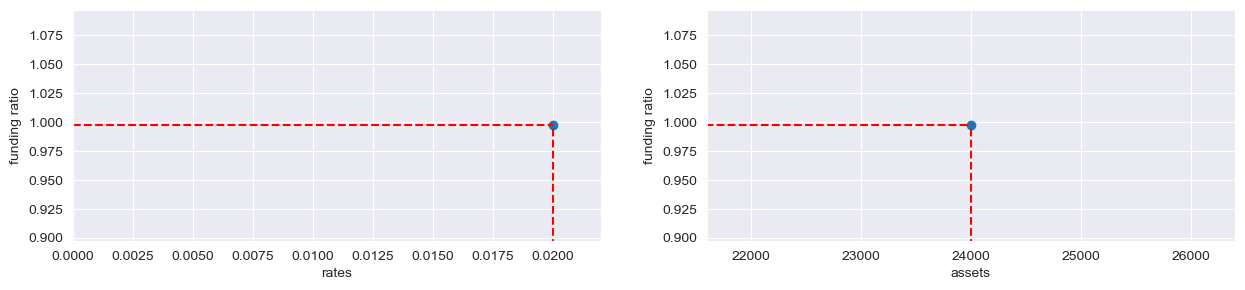

In [9]:
def show_funding_ratio(asset, L, r):
    fr = pok.funding_ratio(asset, L, r)  # Calculate funding ratio.
    print("Funding ratio: {:.3f}".format(float(fr)))  # Print funding ratio.

    # Set up a two-panel plot for visual representation.
    fig, ax = plt.subplots(1, 2, figsize=(15, 3))

    # Ensure r and fr are of the same length for plotting.
    r_array = np.full_like(fr, r)  # Create an array of r repeated to match fr length.
    
    # Plot the funding ratio against interest rates.
    ax[0].scatter(r_array, fr)
    ax[0].set_xlabel("rates")
    ax[0].set_ylabel("funding ratio")
    ax[0].set_xlim([0.0, max(r_array)*1.1])  # Adjust the x-axis limit based on r values.
    ax[0].set_ylim([min(fr)*0.9, max(fr)*1.1])  # Adjust the y-axis limit based on fr values.
    ax[0].plot(r_array, fr, color="b", alpha=0.5)
    # Draw red dashed lines from the point to the axes.
    ax[0].vlines(x=r, ymin=0, ymax=fr, colors='r', linestyles='dashed')
    ax[0].hlines(y=fr, xmin=0, xmax=r, colors='r', linestyles='dashed')
    ax[0].grid()

    # Handle the case where asset is not iterable.
    if not hasattr(asset, '__iter__'):  # If asset is not an iterable
        asset = [asset]  # Convert it into a list

    # Plot the funding ratio against asset values.
    ax[1].scatter(asset, fr)
    ax[1].set_xlabel("assets")
    ax[1].set_ylabel("funding ratio")
    ax[1].set_xlim([min(asset)*0.9, max(asset)*1.1])  # Adjust the x-axis limit based on asset values.
    ax[1].set_ylim([min(fr)*0.9, max(fr)*1.1])  # Adjust the y-axis limit based on fr values.
    ax[1].plot(asset, fr, color="b", alpha=0.5)
    # Draw red dashed lines from the point to the axes.
    for a in asset:
        ax[1].vlines(x=a, ymin=0, ymax=fr, colors='r', linestyles='dashed')
    ax[1].hlines(y=fr, xmin=0, xmax=max(asset), colors='r', linestyles='dashed')
    ax[1].grid()

    plt.show()  # Display the plots.

# Demonstration of the funding ratio function
r = 0.02  # Define an interest rate.
asset = 24000  # Define an asset value.
L = pd.DataFrame([8000, 11000, 6000], index=[1, 2, 3])  # Define liabilities.
show_funding_ratio(asset, L, r)  # Call the function to display the funding ratio.

This function takes the given asset value, liability, and interest rate, computes the funding ratio, and then visualizes how this ratio changes relative to variations in the interest rates and asset values. The plots help understand the sensitivity of the funding ratio to these parameters, allowing for better financial planning and risk assessment.

### Nominal Rate and Effective Annual Interest Rate

Before delving into a stochastic equation that models the variations in interest rates, it's beneficial to revisit compound returns, albeit from a slightly different perspective that introduces a new set of terms.

#### Short-rate vs. Long-Rate (Annualized)

Remember, for a constant return $R$, the compound return over a duration from $t$ to $t+k$ is expressed as:

$$
R_{t,t+k} = (1+R)^{k} - 1.
$$

Take, for instance, the act of borrowing an amount $P := 1\$$, for one year at an annual interest rate of $r_{ann} := 10\%$.
Assuming the repayment is in one installment at the year's end, the return after one year is $10\%$ , leading to a repayment of:

$$
1 + 0.1\cdot 1 = 1.1\$.
$$

Now, consider the scenario where $P$ is borrowed at the same interest rate $r := 10\%$, but repayments are semi-annual. This situation results in a semi-annual rate of $r/2 = 5\%$, accumulating to a total compound return of:

$$
\left(1 + \frac{r}{2}\right)^2 -1 = 0.1025\$,
$$

resulting in a total repayment of $1 + 0.1025\cdot 1= 1.1025\$$.

If repayments were instead monthly, the total would be:

$$
\left(1 + \frac{r}{12}\right)^{12}-1 = 0.1047\$,
$$

leading to a total repayment of $1 + 0.1047\cdot 1= 1.1047\$$.

This illustrates that with more frequent compounding, **`the total compound return increases, necessitating a higher repayment amount.`**

Generally, for a **`nominal interest rate`** $r$ (also known as the **`instantaneous interest rate`**) and $N$ being the **`number of periods`** (or payment intervals for investments, loans, etc.), the total return is:

$$
R = \left(1 + \frac{r}{N}\right)^N - 1.
$$

Here, $R$ represents the **`annualized return`** or **`effective annual interest rate`**, derived from **`discrete compounding`**.

Additionally, the following relationship can be derived from the above formula:

$$
r = N((1+R)^{1/N}-1).
$$

Following the theoretical understanding of nominal and effective annual interest rates, the code below demonstrates the practical calculation using Python. It calculates the effective annual interest rate based on a nominal interest rate and a specified number of compounding periods per year.

In [10]:
# Define the nominal interest rate as 10% and the number of compounding periods as monthly (12 times a year)
nominal_rate = 0.1
periods_per_year = 12

# Calculate the rate for each period (month) and store it in a DataFrame for the first 10 periods
rets = pd.DataFrame([nominal_rate / periods_per_year for i in range(10)])
# Display the first three monthly rates to verify the calculations
print(rets.head(3))

          0
0  0.008333
1  0.008333
2  0.008333


The next part of the code computes the annualized return using a function the PortfolioOptomizerKit

In [11]:
# Calculate the annualized return
ann_ret = pok.annualize_rets(rets, periods_per_year)[0]
print("Annualized Return: ", ann_ret)

# Calculate the effective annual interest rate using the formula for discrete compounding
R = (1 + nominal_rate / periods_per_year) ** periods_per_year - 1
print("Effective Annual Interest Rate: ", R)

Annualized Return:  0.1047130674412966
Effective Annual Interest Rate:  0.10471306744129683


#### Continuous Compounding

When the formula for annualized return is examined, it becomes evident that as $N$ , the number of compounding periods, increases indefinitely, the expression converges to:

$$
\lim_{N\to \infty} \left(1 + \frac{r}{N} \right)^{Nt} = e^{rt},
$$

resulting in the approximation for continuously compounded returns:

$$
R = \lim_{N\to \infty} \left(1 + \frac{r}{N} \right)^{Nt}  - 1 \approx e^{rt} - 1.
$$

Continuous compounding is a theoretical model, but it does have practical applications in certain scenarios.

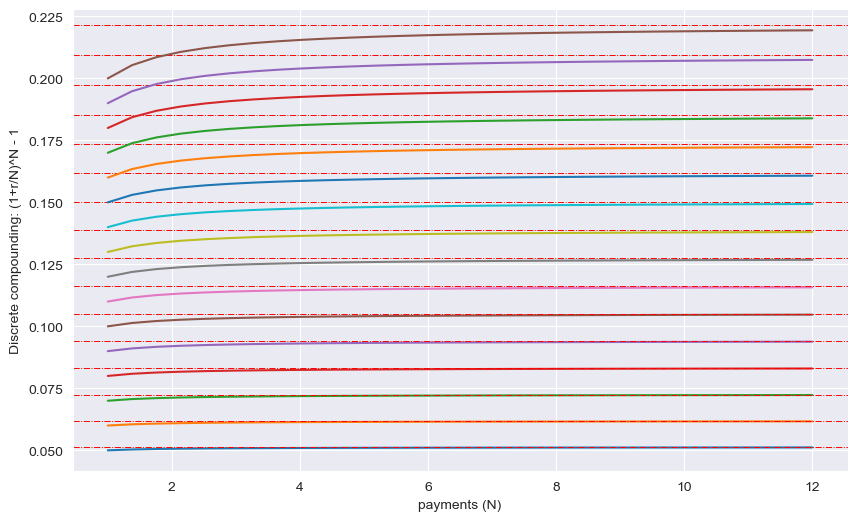

In [12]:
# Generate a range of N values from 1 to 12, totaling 30 points.
N = np.linspace(1,12,30)
# Define a range of nominal rates from 5% to 20%.
nom_rates = np.arange(0.05,0.2,0.01)

# Initialize a plot with specified size.
fig, ax = plt.subplots(1,1,figsize=(10,6))

# Iterate over each nominal rate.
for r in nom_rates:
    # Plot discrete compounding for each rate and N.
    ax.plot(N, (1 + r / N)**N - 1)
    # Plot the line for continuously compounded return for each rate.
    ax.axhline(y=np.exp(r) -  1, color="r", linestyle="-.", linewidth=0.7)
    # Set the y-label as the formula for discrete compounding.
    ax.set_ylabel("Discrete compounding: (1+r/N)^N - 1")
    # Set the x-label as 'payments (N)'.
    ax.set_xlabel("payments (N)")
# Enable grid for better readability.
plt.grid()
plt.show()

This script generates a plot illustrating discrete compounding for various nominal interest rates and the number of payments. It also demonstrates the convergence of discrete compounding to continuous compounding as the number of payments increases.

The graph visualizes the relationship between discrete compounding and the number of payments for different nominal rates, with the continuously compounded return represented by red dashed lines. As the frequency of payments increases, the discrete compounding approaches the continuous compounding rate.

The following Python code snippets illustrate how to calculate discrete and continuous compounding rates using **`pok`** module.

In [13]:
# Assuming 'pok' is a module containing the necessary functions

# Set the nominal rate.
r = 0.1

# Calculate discrete compounding rate with 12 periods per year.
R_disc = pok.compounding_rate(r, periods_per_year=12)
print("Discrete Compounding Rate: ", R_disc)

# Calculate continuous compounding rate.
R_cont = pok.compounding_rate(r)
print("Continuous Compounding Rate: ", R_cont)

# Convert back the continuous compounding rate to the nominal rate.
print("Nominal Rate from Continuous Compounding: ", pok.compounding_rate_inv(R_cont))

Discrete Compounding Rate:  0.10471306744129683
Continuous Compounding Rate:  0.10517091807564771
Nominal Rate from Continuous Compounding:  0.10000000000000007


## CIR Model: Simulating Interest Rate Fluctuations

The **`CIR model`**, named after **`Cox, Ingersoll, and Ross`**, is a mechanism to simulate the variations in interest rates and serves as an enhancement of the **`Vasicek`** model. Its primary function is to circumvent the issue of negative interest rates. As a **`one-factor model`**, or **`short-rate model`**, it posits that interest rate movements are influenced solely by a single market risk factor. This model is often employed in the assessment of interest rate derivatives.

The dynamics of interest rates are defined as follows:

$$
dr_t = a(b-r_t)dt + \sigma\sqrt{r_t}dW_t,
$$

where, $W_t$ represents a Brownian motion, encapsulating the random market risk factor. The term $b$ denotes **`the (long-term) mean interest rate`**, and $b-r_t$ reflects the current deviation of the interest rate from this long-term mean. The parameter $a$ signifies the mean-reversion speed, indicating the rate at which the system returns to the mean interest rate.

The fluctuations in interest rates are therefore contingent on the long-term mean rate ($b$) and the speed at which the rates adjust back to this mean ($a$), after deviations caused by random shocks ($\sigma\sqrt{r_t}dW_t$). Notably, the standard deviation factor $\sigma\sqrt{r_t}$ precludes negative interest rates for all positive $a$ and $b$. Additionally, a zero interest rate is also avoided if $2ab\geq \sigma^2$.

Especially when the rate $r_t$ is nearing zero, the standard deviation $\sigma\sqrt{r_t}$ diminishes, lessening the impact of random fluctuations. In such scenarios, the drift factor predominantly influences the rate, nudging it upward towards equilibrium.

### Applying the CIR Model to Price Zero-Coupon Bonds

In the context of the no-arbitrage principle, zero-coupon bonds can be evaluated using the interest rate process delineated by the CIR model. The price $P(t,T)$ of a zero-coupon bond with maturity $T$ is exponentially affine to the interest rate and is expressed as:

$$
P(t,T) = A(t,T)e^{-B(t,T)r_t},
$$

where

$$
\begin{align}
A(t,T) &:= \left( \frac{ 2h e^{(a+h)\tau/2}  }{ 2h+(a+h)(e^{h\tau}-1) }   \right)^{2ab/\sigma^2}, \\
B(t,T) &:= \frac{ 2(e^{h\tau} - 1)  }{ 2h+(a+h)(e^{h\tau}-1) },  \\
h &:= \sqrt{a^2 + 2\sigma^2}, \\
\tau &:= T - \tau.
\end{align}
$$

Future discussions might delve deeper into this topic.

In [15]:
import ipywidgets as widgets

def show_cir(n_years=10, n_scenarios=10, a=0.05, b=0.05, sigma=0.04, periods_per_year=12, r0=None):
    rates, zcb_price = pok.simulate_cir(n_years=n_years, n_scenarios=n_scenarios, a=a, b=b, sigma=sigma, periods_per_year=periods_per_year, r0=r0)
    
    fig, ax = plt.subplots(1,2,figsize=(20,5))
    rates.plot(ax=ax[0], grid=True, title="CIR model: interest rates", color="indianred", legend=False)
    zcb_price.plot(ax=ax[1], grid=True, title="CIR model: ZCB price", color="indianred", legend=False)

cir_controls = widgets.interact(show_cir, 
                                n_years = (1, 10, 1), 
                                n_scenarios = (1, 200, 1), 
                                a = (0.005, 1, 0.005), 
                                b = (0.002, 0.15, 0.001), 
                                sigma = (0.001, 0.15, 0.001), 
                                periods_per_year = [12, 52, 252], 
                                r0 = (0.002, 0.30, 0.01)
                               )

interactive(children=(IntSlider(value=10, description='n_years', max=10, min=1), IntSlider(value=10, descripti…

It's crucial to acknowledge that interactive elements are best experienced through a Jupyter notebook, as it provides the necessary interface for ipywidgets. Running these widgets in a standard script or terminal won't yield interactive visualizations. Environments like VSCode, which typically incorporate Jupyter notebook support, facilitate the execution and interaction with these widgets within the editor.

## Liability Hedging

Given a model to project interest rate changes and the corresponding fluctuations in **`zero-coupon`** bond prices, one can evaluate the efficacy of using zero-coupon bonds as a hedge against cash. Variations in interest rates significantly impact future liabilities and funding ratios. Thus, it's prudent to understand how a portfolio might respond to these changes.

The core issue is: **`there is a future liability to be met`**, and with fluctuating interest rates, it's crucial to implement **`a hedging strategy to ensure that the asset's increase in value will suffice`**.

Consider:

In [6]:
# Initial asset amount in millions of dollars
asset_0  = 0.75
# Total liability in millions of dollars
tot_liab = 1

# Nominal rate of the liability
mean_rate = 0.03
# Time horizon for the liability in years
n_years   = 10
# Number of different interest rate scenarios to simulate
n_scenarios = 10
# Number of periods per year for compounding
periods_per_year = 12

Here, the initial asset is $0.75 million (**`asset_0`**), and the total liability is $1 million (**`tot_liab`**) due in 10 years. The mean nominal rate of this liability is $3\%$.

### Simulating Interest Rates and Zero-Coupon Bond Prices

Interest rates for the next 10 years are simulated starting from the mean rate:

In [9]:
# Simulate interest rates using the CIR model and calculate corresponding ZCB prices
rates, zcb_price = pok.simulate_cir(n_years=n_years, n_scenarios=n_scenarios, 
                                    a=0.05, b=mean_rate, sigma=0.08, periods_per_year=periods_per_year)
rates.head()

,0,1,2,3,4,5,6,7,8,9
0,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000
1,0.036419,0.031442,0.025873,0.034719,0.036400,0.031203,0.027809,0.031125,0.029351,0.032295
2,0.037661,0.022171,0.022011,0.037989,0.033738,0.031141,0.027260,0.034414,0.038798,0.021282
3,0.035987,0.027145,0.016601,0.036282,0.032167,0.028531,0.027536,0.037279,0.035284,0.025853
4,0.031074,0.029670,0.017699,0.044470,0.024497,0.036226,0.025905,0.044738,0.032483,0.026681


The liabilities over time are approximated using the simulated zero-coupon bond prices, reflecting the impact of interest rate changes:

In [8]:
# Assign the simulated ZCB prices as the liabilities
L = zcb_price
L.head()

,0,1,2,3,4,5,6,7,8,9
0,0.758469,0.758469,0.758469,0.758469,0.758469,0.758469,0.758469,0.758469,0.758469,0.758469
1,0.760034,0.760034,0.760034,0.760034,0.760034,0.760034,0.760034,0.760034,0.760034,0.760034
2,0.773244,0.770328,0.759842,0.736749,0.778755,0.727982,0.759828,0.719744,0.745374,0.754632
3,0.775720,0.762901,0.724952,0.745514,0.776342,0.763510,0.744687,0.748515,0.754849,0.739743
4,0.781536,0.806996,0.741519,0.760128,0.791441,0.752023,0.763787,0.723405,0.746290,0.725873


#### Hedging with Zero-Coupon Bonds

The objective is to meet the liability in 10 years by investing the current assets in a zero-coupon bond:

In [10]:
# Calculate the price of a ZCB maturing in 10 years with a rate equal to the mean rate
zcb = pd.DataFrame(data=[tot_liab], index=[n_years])
zcb_price_0 = pok.present_value(zcb, mean_rate)
zcb_price_0

0    0.744094
dtype: float64

This calculation estimates the present value of a zero-coupon bond that will pay off $1 million plus $3\%$ interest in 10 years. The investment strategy involves purchasing such zero-coupon bonds:

In [11]:
# Calculate the number of bonds that can be bought with the initial assets
n_bonds = float(asset_0 / zcb_price_0)
n_bonds

C:\Users\amine\AppData\Local\Temp\ipykernel_24168\3443740747.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  n_bonds = float(asset_0 / zcb_price_0)


1.0079372845080916

With the number of bonds determined, the future value of the assets invested in the zero-coupon bond can be tracked:

In [12]:
# Calculate the future asset value of the zero-coupon bond investment
asset_value_of_zcb = n_bonds * zcb_price
asset_value_of_zcb.head()

,0,1,2,3,4,5,6,7,8,9
0,0.764489,0.764489,0.764489,0.764489,0.764489,0.764489,0.764489,0.764489,0.764489,0.764489
1,0.766066,0.766066,0.766066,0.766066,0.766066,0.766066,0.766066,0.766066,0.766066,0.766066
2,0.734080,0.759959,0.790159,0.742804,0.734178,0.761226,0.779509,0.761645,0.771139,0.755453
3,0.729501,0.812420,0.813332,0.727852,0.749554,0.763169,0.784052,0.746053,0.723806,0.817495
4,0.739685,0.786222,0.846140,0.738190,0.759395,0.778708,0.784095,0.733155,0.743268,0.793298


#### Hedging by Holding Cash

Alternatively, consider holding cash instead of investing in zero-coupon bonds:

In [13]:
# Calculate the future asset value when holding cash, accounting for compounding interest
asset_value_in_cash = asset_0 * (1 + rates/periods_per_year).cumprod()
asset_value_in_cash.head()

,0,1,2,3,4,5,6,7,8,9
0,0.751875,0.751875,0.751875,0.751875,0.751875,0.751875,0.751875,0.751875,0.751875,0.751875
1,0.754157,0.753845,0.753496,0.754050,0.754156,0.753830,0.753617,0.753825,0.753714,0.753898
2,0.756524,0.755238,0.754878,0.756438,0.756276,0.755786,0.755329,0.755987,0.756151,0.755236
3,0.758793,0.756946,0.755922,0.758725,0.758303,0.757583,0.757063,0.758335,0.758374,0.756863
4,0.760757,0.758818,0.757037,0.761536,0.759851,0.759870,0.758697,0.761163,0.760427,0.758545


#### Comparing the Two Investment Strategies

Visualizing the future value of both investment strategies:

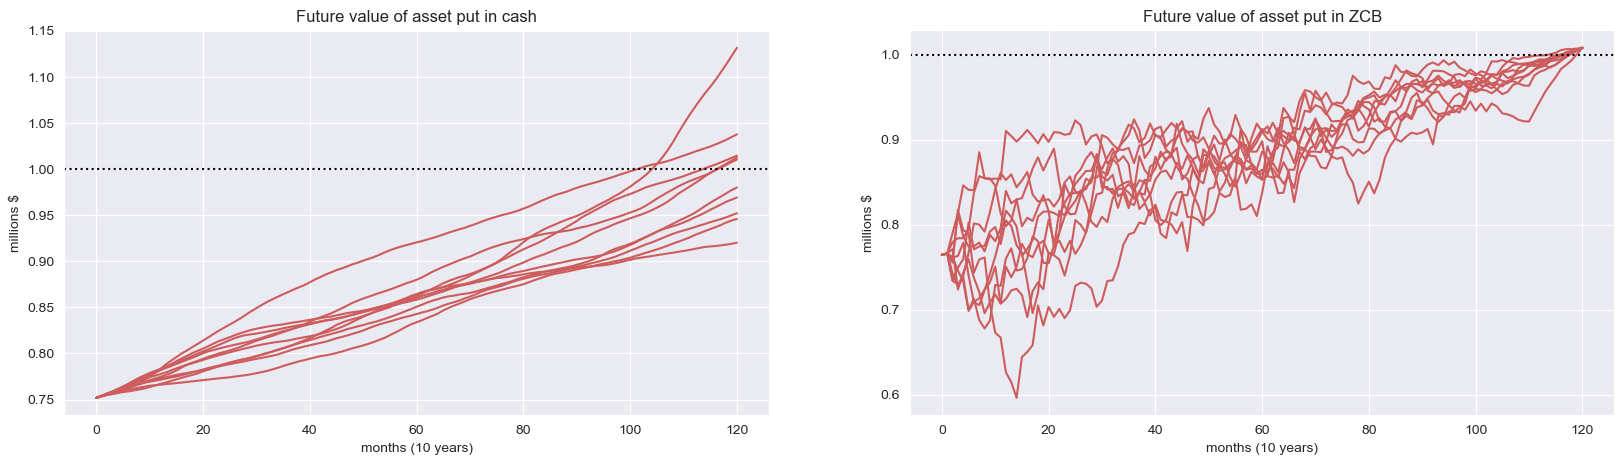

In [14]:
# Plotting the future values of assets when invested in cash and zero-coupon bonds
fig, ax = plt.subplots(1,2,figsize=(20,5))

asset_value_in_cash.plot(ax=ax[0], grid=True, legend=False, color="indianred", title="Future value of asset put in cash")
asset_value_of_zcb.plot(ax=ax[1], grid=True, legend=False, color="indianred", title="Future value of asset put in ZCB")
ax[0].axhline(y=1.0, linestyle=":", color="black")
ax[1].axhline(y=1.0, linestyle=":", color="black")
ax[0].set_ylabel("millions $")
ax[1].set_ylabel("millions $")
if periods_per_year == 12:
    ax[0].set_xlabel("months ({:.0f} years)".format((len(asset_value_in_cash.index)-1)/periods_per_year))
    ax[1].set_xlabel("months ({:.0f} years)".format((len(asset_value_in_cash.index)-1)/periods_per_year))

plt.show()

While the cash investment's increase in value appears smoother, there are scenarios where it fails to meet the $1 million liability. Conversely, despite fluctuations, zero-coupon bond investments consistently meet the required amount at maturity.

The **`funding ratios`** for both investments are then examined:

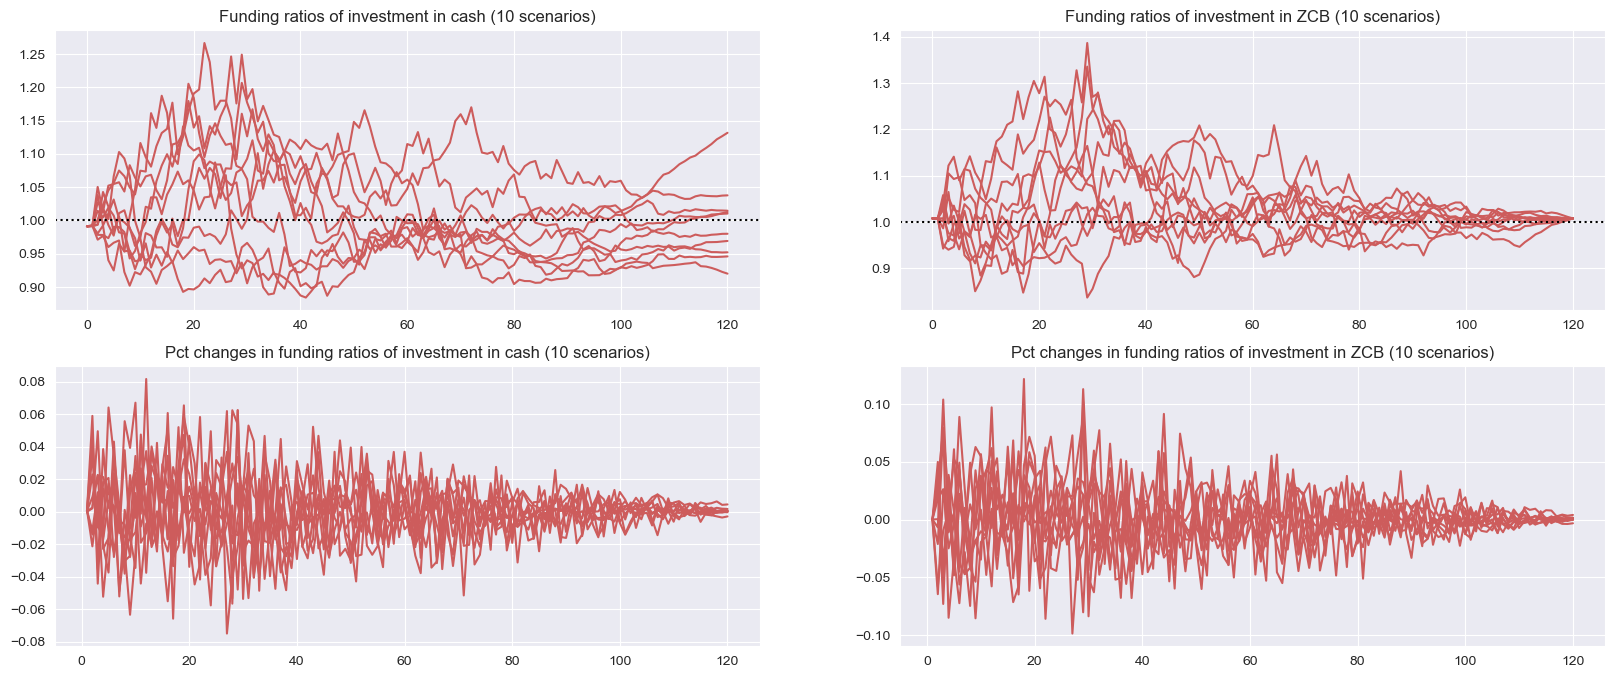

In [15]:
# Calculate the funding ratios for both cash and zero-coupon bond investments
fr_cash = asset_value_in_cash / L
fr_zcb  = asset_value_of_zcb  / L

# Plotting the funding ratios and their percentage changes for both investments
fig, ax = plt.subplots(2,2,figsize=(20,8))

fr_cash.plot(ax=ax[0,0], grid=True, legend=False, color="indianred", 
             title="Funding ratios of investment in cash ({} scenarios)".format(n_scenarios))
fr_zcb.plot(ax=ax[0,1], grid=True, legend=False, color="indianred", 
            title="Funding ratios of investment in ZCB ({} scenarios)".format(n_scenarios))

ax[0,0].axhline(y=1.0, linestyle=":", color="black")
ax[0,1].axhline(y=1.0, linestyle=":", color="black")

fr_cash.pct_change().plot(ax=ax[1,0], grid=True, legend=False, color="indianred",
                          title="Pct changes in funding ratios of investment in cash ({} scenarios)".format(n_scenarios))
fr_zcb.pct_change().plot(ax=ax[1,1], grid=True, legend=False, color="indianred", 
                         title="Pct changes in funding ratios of investment in ZCB ({} scenarios)".format(n_scenarios))
plt.show()

For a more extensive analysis, the **`terminal`** funding ratios are considered:

C:\Users\amine\AppData\Local\Temp\ipykernel_24168\1363986489.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  n_bonds = float(asset_0 / zcb_price_0)


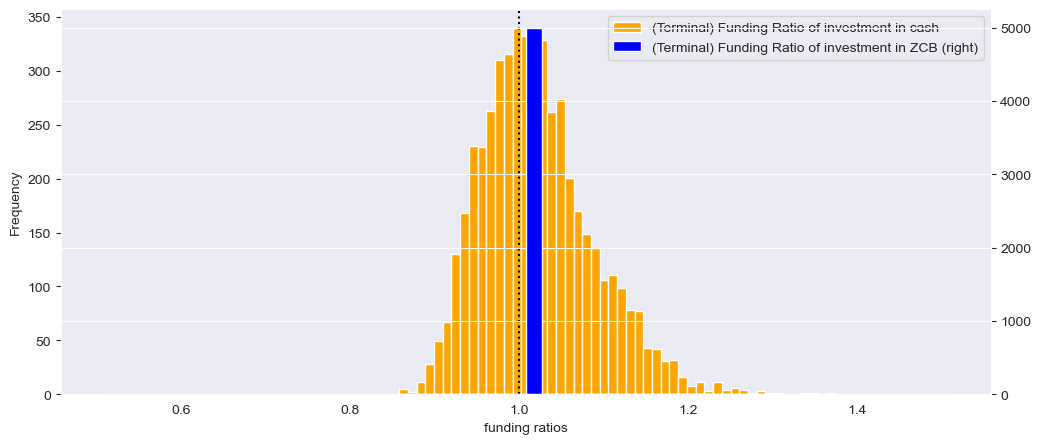

In [16]:
# Simulate a larger number of scenarios
n_scenarios = 5000
rates, zcb_price = pok.simulate_cir(n_years=n_years, n_scenarios=n_scenarios, a=0.05, 
                                    b=mean_rate, sigma=0.08, periods_per_year=periods_per_year)
# Assign the simulated ZCB prices as liabilities
L = zcb_price
# Recalculate the ZCB and cash investments
zcb = pd.DataFrame(data=[tot_liab], index=[n_years])
zcb_price_0 = pok.present_value(zcb, mean_rate)
n_bonds = float(asset_0 / zcb_price_0)
asset_value_of_zcb = n_bonds * zcb_price
asset_value_in_cash = asset_0 * (1 + rates/periods_per_year).cumprod()

# Calculate terminal funding ratios
terminal_fr_zcb  = asset_value_of_zcb.iloc[-1]  / L.iloc[-1]
terminal_fr_cash = asset_value_in_cash.iloc[-1] / L.iloc[-1]

# Plotting histograms of terminal funding ratios for cash and zero-coupon bond investments
ax = terminal_fr_cash.plot.hist(label="(Terminal) Funding Ratio of investment in cash", bins=50, figsize=(12,5), color="orange", legend=True)
terminal_fr_zcb.plot.hist(ax=ax, grid=True, label="(Terminal) Funding Ratio of investment in ZCB", bins=50, legend=True, color="blue", secondary_y=True)
ax.axvline(x=1.0, linestyle=":", color="k")
ax.set_xlabel("funding ratios")
plt.show()

This analysis shows that while cash investments can perform well in many scenarios, there's a significant risk of failing to meet liabilities. Conversely, zero-coupon bond investments consistently provide a funding ratio of at least 1, ensuring the liabilities are met.

## Coupon-Bearing Bonds

Contrasting with zero-coupon bonds, which offer a single cash flow comprising the **`principal`** (also known as the **`face value`**, or **`par value`**) plus accrued interest, a **`coupon-bearing bond`** disburses regular coupons throughout its maturity. The final cash flow includes the last coupon in addition to the principal:

$$
\text{Bond price}= PV = \sum_{i=1}^N \left(\frac{C_{t_i}}{(1+\text{YTM})^{t_i}}\right)  +  \frac{F}{(1+\text{YTM})^{t_N}} 
= C\left(\frac{1-(1+\text{YTM})^{-t_N}}{\text{YTM}}\right) +  \frac{F}{(1+\text{YTM})^{t_N}},
$$

where $N$ is the total number of coupons, $C_{t_i}$ represents the coupon paid at time $t_i$ (all are identical), $F$ is the bond's face value,
and $\text{YTM}$ denotes the yield to maturity. Yield to maturity is the annual rate yield achieved when an investor holds the bond until its maturity.

### Cash Flow from a Bond

Consider a bond's cash flow:

In [18]:
# Bond parameters
principal        = 100 
maturity         = 3
ytm              = 0.05
coupon_rate      = 0.03 
coupons_per_year = 2

# Calculating bond cash flows
cf = pok.bond_cash_flows(principal=principal, maturity=maturity, coupon_rate=coupon_rate, coupons_per_year=coupons_per_year)
cf

,0
1,1.5
2,1.5
3,1.5
4,1.5
5,1.5
6,101.5


With bi-annual coupons, each payment is $\$0.015$ (half the coupon rate) over 6 periods, with the final payment including both the face value and the last coupon.

### Bond Price Calculation

The bond's price is calculated as:

In [20]:
# Calculating the bond price given its parameters and YTM
bond_price = pok.bond_price(principal=principal, maturity=maturity, coupon_rate=coupon_rate, coupons_per_year=coupons_per_year, ytm=ytm)
print(bond_price)

# Calculating the total sum paid by the bond if held until maturity 
tot_bond_paym = cf.sum()[0]
print(tot_bond_paym)

# Calculating the gain from investing in the bond
gain = -bond_price + tot_bond_paym
print(gain)

94.49187463842023
109.0
14.508125361579772


The Yield to Maturity (YTM) of 0.05 approximately represents the annual rate that, after compounding, yields a total amount equal to tot_bond_paym from an initial investment equal to bond_price:

In [21]:
# Calculating the annual rate corresponding to the YTM
r = (tot_bond_paym / bond_price )**(1/maturity) - 1
print(r)

0.048762968814507035


### Yield to Maturity and Bond Price Relationship

The relationship between the bond's selling price and its face value is dependent on the YTM in relation to the coupon rate:

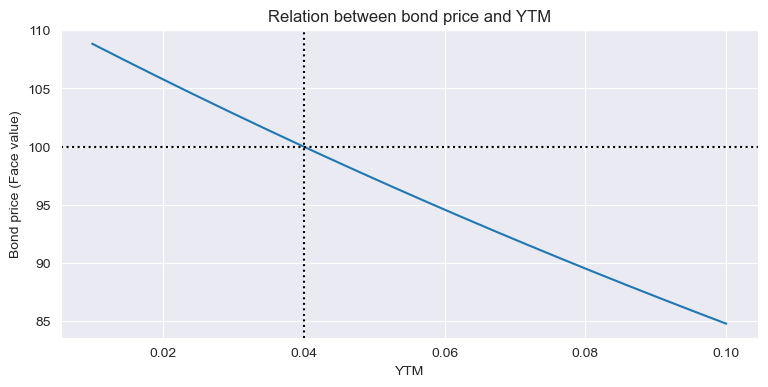

In [23]:
# Calculating bond prices under different scenarios to illustrate the relationship between YTM and bond price
# Bond selling at a discount: bond price is smaller than face value
pok.bond_price(principal=100, maturity=3, coupon_rate=0.03, coupons_per_year=2, ytm=0.05)

# Bond selling at a premium: bond price is larger than face value
pok.bond_price(principal=100, maturity=3, coupon_rate=0.03, coupons_per_year=2, ytm=0.02)

# Bond selling at par: bond price is equal to face value
pok.bond_price(principal=100, maturity=3, coupon_rate=0.03, coupons_per_year=2, ytm=0.03)

# Plotting the relationship between YTM and bond price
coupon_rate = 0.04
principal = 100
ytm = np.linspace(0.01, 0.10, 20)
bond_prices = [pok.bond_price(maturity=3, principal=principal, coupon_rate=coupon_rate, coupons_per_year=2, ytm=r) for r in ytm]

# Visualizing the bond price as a function of YTM
ax = pd.DataFrame(bond_prices, index=ytm).plot(grid=True, title="Relation between bond price and YTM", figsize=(9,4), legend=False)
ax.axvline(x=coupon_rate, linestyle=":", color="black")
ax.axhline(y=principal, linestyle=":", color="black")
ax.set_xlabel("YTM")
ax.set_ylabel("Bond price (Face value)")
plt.show()

The bond sells **`at a discount`** when its price is below the face value, typically when the YTM is greater than the coupon rate. It sells **`at a premium`** when the price exceeds the face value, usually when the YTM is lower than the coupon rate. When the bond sells **`at par`**, its price equals the face value, occurring when the YTM matches the coupon rate. Thus, the bond price and YTM share an inverse relationship.

### Variations in Bond Price

The yield to maturity is not a constant but varies over time. It's an interest rate that fluctuates, consequently altering the bond's price.

#### Observing Price Changes with Interest Rate Fluctuations

To understand how a coupon-bearing bond's price shifts with changing interest rates, consider simulating these rates using the CIR model:

           0         1         2         3         4         5         6  \
16  0.022390  0.020054  0.035682  0.039620  0.035319  0.036040  0.028372   
17  0.023721  0.019885  0.035436  0.038955  0.033191  0.035551  0.033122   
18  0.024568  0.019309  0.034047  0.038902  0.030808  0.034743  0.038961   
19  0.023095  0.018958  0.034300  0.043474  0.032403  0.032382  0.038752   
20  0.023005  0.018924  0.031028  0.039107  0.031434  0.033471  0.039129   

           7         8         9  
16  0.031658  0.039936  0.027713  
17  0.034595  0.034277  0.026232  
18  0.034564  0.035032  0.024031  
19  0.036686  0.040456  0.024908  
20  0.036920  0.049410  0.027674  


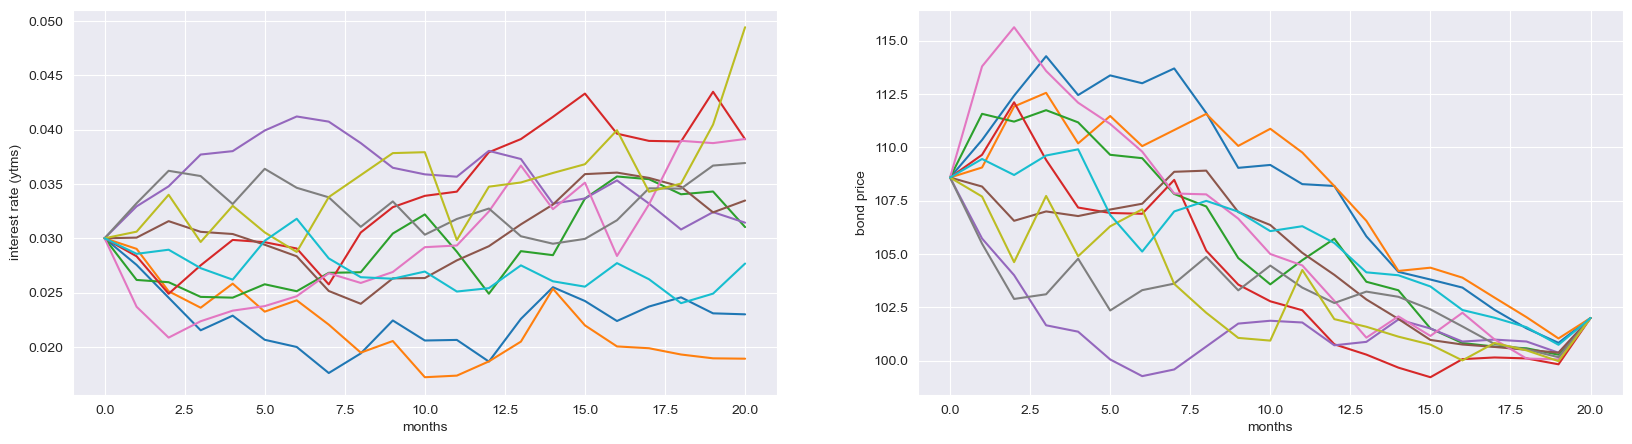

In [26]:
# Simulation parameters
n_years          = 10
n_scenarios      = 10
b                = 0.03  # Long-term mean interest rate
periods_per_year = 2

# Simulating interest rates using the CIR model
rates, _ = pok.simulate_cir(n_years=n_years, n_scenarios=n_scenarios, a=0.02, b=b, sigma=0.02, periods_per_year=periods_per_year)
print(rates.tail())

# Bond characteristics
principal        = 100
maturity         = n_years
coupon_rate      = 0.04
coupons_per_year = periods_per_year

# Calculate bond prices based on the simulated interest rates
bond_prices = pok.bond_price(principal=principal, maturity=maturity, coupon_rate=coupon_rate, 
                             coupons_per_year=coupons_per_year, ytm=rates)

# Plotting the changes in interest rates and corresponding bond prices
fig, ax = plt.subplots(1,2,figsize=(20,5))
rates.plot(ax=ax[0], grid=True, legend=False) 
bond_prices.plot(ax=ax[1], grid=True, legend=False)
ax[0].set_xlabel("months")
ax[0].set_ylabel("interest rate (ytms)")
ax[1].set_xlabel("months")
ax[1].set_ylabel("bond price")
plt.show()

The left graph illustrates interest rate changes over time, while the right graph shows the corresponding shifts in bond price. Notably, the price of bonds at maturity converges across all scenarios, reflecting the principal plus coupon-interest.

#### Calculating Total Return of a Coupon-Bearing Bond

To comprehend the total returns of these bonds, one might initially consider the price changes. However, this approach omits coupon payments:

In [27]:
# Computing return by percentage changes in bond price
bond_rets = bond_prices.pct_change().dropna()

# Annualizing the returns
pok.annualize_rets(bond_rets, periods_per_year=periods_per_year)

0   -0.006236
1   -0.006236
2   -0.006236
3   -0.006236
4   -0.006236
5   -0.006236
6   -0.006236
7   -0.006236
8   -0.006236
9   -0.006236
dtype: float64

This calculation yields a uniform negative return across all bonds, an artifact of disregarding coupon payments and the coupon rate exceeding the mean interest rate $b$.

In contrast, bonds regularly disburse coupons. To accurately calculate total returns, consider these payments:

In [28]:
# Calculating total bond returns by considering coupon payments
bond_rets = pok.bond_returns(principal=principal, bond_prices=bond_prices, coupon_rate=coupon_rate, 
                             coupons_per_year=coupons_per_year, periods_per_year=periods_per_year)
pok.annualize_rets(bond_rets, periods_per_year=periods_per_year)

0    0.030980
1    0.031070
2    0.031826
3    0.032472
4    0.033361
5    0.032140
6    0.031696
7    0.032777
8    0.032772
9    0.031839
dtype: float64

These figures represent the correctly computed total returns of the bonds, aligning closely with the mean rate $b$ (0.03).

In cases where the bond price and interest rate are fixed, the total return is as follows:

In [29]:
# Setting a fixed yield to maturity
ytm = 0.035
# Calculating the bond price with the given YTM
b_price = pok.bond_price(principal=principal, maturity=maturity, coupon_rate=coupon_rate, coupons_per_year=coupons_per_year, ytm=ytm) 

# Calculating total returns for the bond at the given price
b_ret = pok.bond_returns(principal=principal, bond_prices=b_price, coupon_rate=coupon_rate, 
                         coupons_per_year=coupons_per_year, periods_per_year=periods_per_year, maturity=maturity)

# Displaying the bond price and return
print("Bond price:  {:.6f}".format(b_price))
print("Bond return: {:.6f}".format(b_ret))

Bond price:  104.188220
Bond return: 0.029985


Here, the return approximates the YTM, demonstrating the relationship between a bond's yield to maturity and its total return.

## Macaulay Duration

**`Macaulay Duration`** represents **`the weighted average time to receive the bond's cash flows`**. Consider a bond with a series of fixed cash flows, including coupon payments and the principal's final payment. The total present value of these cash flows is:

$$
PV = \sum _{i=1}^{N} PV_{i}.
$$

The Macaulay duration is then calculated as:

$$
\text{MacD} 
:= \frac{ \sum_{i=1}^N t_i PV_i}{ \sum _{i=1}^{N} PV_{i} }
= \frac{ \sum_{i=1}^N t_i PV_i}{PV} 
= \sum_{i=1}^N w_i t_i
\quad\text{with}\quad
w_i := \frac{PV_i}{PV}, 
$$

where $PV_{i}$ is the present value of the cash flow paid at time $t_{i}$. For a zero-coupon bond, which only pays at maturity, the Macaulay duration equals the bond's maturity.

### Calculating Macaulay Duration for a Bond

In [30]:
# Bond parameters
principal        = 1000
maturity         = 3
ytm              = 0.06
coupon_rate      = 0.06
coupons_per_year = 2

# Calculating bond cash flows
cf = pok.bond_cash_flows(principal=principal, maturity=maturity, coupon_rate=coupon_rate, coupons_per_year=coupons_per_year)
print(cf)

# Calculating Macaulay Duration using the YTM divided by the number of coupons per year
macd = pok.mac_duration(cf, discount_rate=ytm/coupons_per_year) 
macd = macd / coupons_per_year
print(macd)

        0
1    30.0
2    30.0
3    30.0
4    30.0
5    30.0
6  1030.0
2.789853593597267


The calculated duration of the bond is approximately 2.79 years versus the actual maturity of 3 years. The duration is adjusted to reflect the number of total periods (from 1 to 6) by dividing by the number of coupons per year.

### Alternative Approach: Normalizing Cash Flow Dates

In [31]:
# Normalizing cash flows dates
cf = pok.bond_cash_flows(principal=principal, maturity=maturity, coupon_rate=coupon_rate, coupons_per_year=coupons_per_year)
cf.index = cf.index / coupons_per_year
print(cf)

# Calculating Macaulay Duration using only the YTM as discount rate
pok.mac_duration(cf, discount_rate=ytm)

          0
0.5    30.0
1.0    30.0
1.5    30.0
2.0    30.0
2.5    30.0
3.0  1030.0


2.7901469374492027

In this method, only the YTM is used as the discount rate. The interpretation is that, as the bond pays coupons during its life, the effective time to recoup the investment is less than the maturity due to the receipt of money throughout the bond's term.

### Validating Zero-Coupon Bond Duration

In [32]:
# Zero-Coupon Bond: only one cash flow at maturity
maturity = 3
cf = pd.DataFrame(data=[100], index=[maturity])
# Calculating Macaulay Duration for a zero-coupon bond, the rate is irrelevant
macd = pok.mac_duration(cf, discount_rate=0.05) # the rate does not impact the duration
print(macd)

3.0


This confirms that for a zero-coupon bond, the Macaulay Duration is equal to the maturity, regardless of the interest rate. This demonstrates that duration is a measure of the time-weighted cash flows of a bond and provides an insight into the bond's sensitivity to interest rate changes.

## Liability Driven Investing (LDI)

### Creating Duration-Matched Portfolios

The aim is to **`construct a bond portfolio with a duration matching that of a future liability`**. Consider an asset with the following value:

In [33]:
# Initial asset value
asset_value = 130000

This code initializes the asset value, which is the amount available to invest in the bond portfolio.

Assume there are future liabilities represented by a series of cash flows. The goal is to determine the weight distribution across various bonds in the portfolio so that the **`portfolio's duration aligns with the liabilities' duration`**.

In [34]:
# Interest rate and liabilities defined
interest_rate = 0.04

L = pd.DataFrame([100000, 100000], index=[10,12])
print(L)

# Calculating Macaulay duration of liabilities
macd_liab = pok.mac_duration(L, discount_rate=interest_rate)
print("Liability duration: {:.3f} years".format(macd_liab))

         0
10  100000
12  100000
Liability duration: 10.961 years


In this example, two equal payments are due in 10 and 12 years, resulting in a **`liability duration of about 10.96 years`**.

If an ideal zero-coupon bond matching the liability duration is unavailable, the strategy might involve investing in available bonds with different maturities, such as **`10-year`** and **`20-year`** bonds:

In [35]:
# Defining bond parameters
principal = 1000
maturity_short = 10
coupon_rate_short = 0.05 
coupons_per_year_short = 1
ytm_short = interest_rate

maturity_long = 20
coupon_rate_long = 0.05 
coupons_per_year_long = 1
ytm_long = interest_rate

First, examine the durations of these bonds:

In [36]:
# Calculating cashflows for short and long bonds
cf_short = pok.bond_cash_flows(principal=principal, maturity=maturity_short, coupon_rate=coupon_rate_short, coupons_per_year=coupons_per_year_short)
cf_long  = pok.bond_cash_flows(principal=principal, maturity=maturity_long, coupon_rate=coupon_rate_long, coupons_per_year=coupons_per_year_long)

# Calculating Macaulay durations for short and long bonds
macd_short = pok.mac_duration(cf_short, discount_rate=ytm_short /coupons_per_year_short) /coupons_per_year_short
macd_long  = pok.mac_duration(cf_long,  discount_rate=ytm_long  /coupons_per_year_long)  /coupons_per_year_long
print("(Short) bond duration: {:.3f} years".format(macd_short))
print("(Long) bond duration:  {:.3f} years".format(macd_long))

(Short) bond duration: 8.191 years
(Long) bond duration:  13.545 years


Next, determine the **`investment proportions for the short and long bonds to match the portfolio duration with the liabilities`**:

$$
w\;d_s + (1-w)\; d_\ell = d_{liab}
\quad\Longrightarrow\quad
w = \frac{d_{liab} - d_\ell}{d_s - d_\ell}.
$$

where $d_{liab}$ is the duration of the liability, $d_s$ is the duration of the short-term bond, and $d_\ell$ is the duration of the long-term bond.

In [37]:
# Calculating weight for the short bond to match the portfolio duration with liability duration
w_short = (macd_liab - macd_long) / (macd_short - macd_long)
print(w_short)

0.4826309206947901


This output indicates that approximately $48\%$ of the funds should be allocated to the short-term bond, and the remaining $52\%$ to the long-term bond.

Before proceeding, determine the bond prices:

In [38]:
# Determine prices for both short and long-term bonds
bondprice_short = pok.bond_price(principal=principal, maturity=maturity_short, coupon_rate=coupon_rate_short, 
                                 coupons_per_year=coupons_per_year_short, ytm=ytm_short)
bondprice_long  = pok.bond_price(principal=principal, maturity=maturity_long, coupon_rate=coupon_rate_long, 
                                 coupons_per_year=coupons_per_year_long, ytm=ytm_long)
print("Price of the short-term bond: {:.2f}".format(bondprice_short))
print("Price of the long-term bond: {:.2f}".format(bondprice_long))

Price of the short-term bond: 1081.11
Price of the long-term bond: 1135.90


Determine the portfolio's cash flows:

In [40]:
# Calculate portfolio cashflows for short and long-term bonds
portfolio_cf_short = w_short     * asset_value / bondprice_short * cf_short
portfolio_cf_long  = (1-w_short) * asset_value / bondprice_long  * cf_long

# Combine cashflows from both bonds
portfolio_cf = pd.concat([portfolio_cf_short, portfolio_cf_long], axis=1).fillna(0)        
portfolio_cf.columns = ["Cashflow from short-term bond", "Cashflow from long-term bond"]

# Add the total cashflow of the portfolio
portfolio_cf["Total Portfolio Cashflow"] = portfolio_cf.sum(axis=1)
portfolio_cf

,Cashflow from short-term bond,Cashflow from long-term bond,Total Portfolio Cashflow
1,2901.743586,2960.550536,5862.294122
2,2901.743586,2960.550536,5862.294122
3,2901.743586,2960.550536,5862.294122
4,2901.743586,2960.550536,5862.294122
5,2901.743586,2960.550536,5862.294122
6,2901.743586,2960.550536,5862.294122
7,2901.743586,2960.550536,5862.294122
8,2901.743586,2960.550536,5862.294122
9,2901.743586,2960.550536,5862.294122
10,60936.615315,2960.550536,63897.165851


These cashflows represent the individual contributions from the short and long-term bonds and the aggregate portfolio cashflow. Verify the portfolio's duration matches the liability's duration:

In [41]:
# Convert the portfolio cashflow to a dataframe
portfolio_cf = pd.DataFrame(portfolio_cf["Total Portfolio Cashflow"])
portfolio_cf.columns = [0]

# Calculate Macaulay duration for the portfolio
macd_portfolio = pok.mac_duration(portfolio_cf, discount_rate=interest_rate)
print("Duration of the portfolio: {:.3f} years".format(macd_portfolio))

Duration of the portfolio: 10.961 years


The output should confirm the portfolio's duration is aligned with the liability's duration, ensuring that the strategy is correctly implemented. 

Exceptionally, the method for computing the **`funding ratio`** in **`PortfolioOptimazerKit`** will be modifed to consider the present value of both liabilities and bond cashflows:

In [42]:
def funding_ratio(asset_value, liabilities, r):
    '''Computes the funding ratio between the present value of holding assets and the present 
    value of the liabilities given an interest rate r (or a list of)'''
    return pok.present_value(asset_value, r) / pok.present_value(liabilities, r)

Finally, assess the funding ratios for different investment strategies:

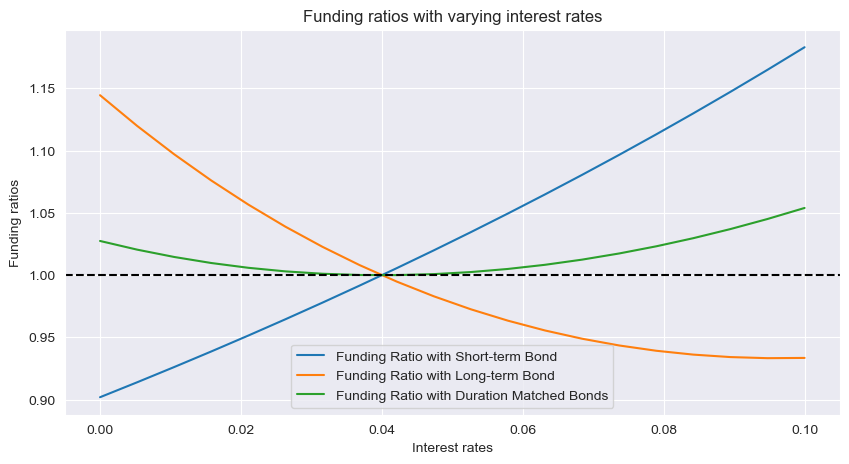

In [43]:
# Series of cashflows for short and long-term bonds
short_bond_asset = asset_value / bondprice_short * cf_short
long_bond_asset  = asset_value / bondprice_long * cf_long

# Range of interest rates
rates = np.linspace(0, 0.1, 20)

# Calculate funding ratios for different investment strategies
funding_ratios = pd.DataFrame(
    {
        "Funding Ratio with Short-term Bond": [funding_ratio(short_bond_asset, L, r)[0] for r in rates],
        "Funding Ratio with Long-term Bond": [funding_ratio(long_bond_asset, L, r)[0] for r in rates],
        "Funding Ratio with Duration Matched Bonds": [funding_ratio(portfolio_cf, L, r)[0] for r in rates]
    }, index = rates
)

# Plotting funding ratios against interest rates
ax = funding_ratios.plot(grid=True, figsize=(10,5), title="Funding ratios with varying interest rates")
ax.set_xlabel("Interest rates")
ax.set_ylabel("Funding ratios")
ax.axhline(y=1, linestyle="--", c="k")
plt.show()

This plot illustrates how **`investing in a portfolio with a duration matched to the liabilities guarantees a funding ratio greater than or equal to 1 across a range of interest rates`**, contrasting with the other strategies where the funding ratio can fall below 1 under certain conditions.

### Constructing Portfolios with Non-Matching Bond Durations

In scenarios where the available bonds do not perfectly match the desired duration, an adjustment is needed. The method duration_match_weight calculates the weights for two bonds to achieve the target duration:

In [44]:
def duration_match_weight(d1, d2, d_liab):
    w1 = (d_liab - d2) / (d1 - d2)
    w2 = 1 - w1
    return w1, w2

This function calculates the **`proportions to invest in two bonds to match a target duration`**.

Consider the following flat interest rate and liabilities:

In [45]:
flat_yield = 0.05

# Defining future liabilities
L = pd.DataFrame([100000, 200000, 300000], index=[3,5,10])
print(L)

# Calculating the Macaulay duration for these liabilities
macd_L = pok.mac_duration(L, discount_rate=flat_yield)
print("Duration of liabilities: ", macd_L)

         0
3   100000
5   200000
10  300000
Duration of liabilities:  6.750917852744651


This setup specifies three future payments, with the calculated Macaulay duration indicating the weighted average time until these cash flows are received.

The available bonds are detailed as follows:

In [46]:
principal = 1000

# Details for Bond 1
maturity_b1         = 15
coupon_rate_b1      = 0.05
ytm_b1              = flat_yield
coupons_per_year_b1 = 2

# Details for Bond 2
maturity_b2         = 5
coupon_rate_b2      = 0.06
ytm_b2              = flat_yield
coupons_per_year_b2 = 4

Calculate the cash flows for these bonds and normalize the dates:

In [47]:
# Calculate cash flows for both bonds and normalize dates
cf_b1 = pok.bond_cash_flows(principal=principal, maturity=maturity_b1, coupon_rate=coupon_rate_b1, coupons_per_year=coupons_per_year_b1)
cf_b2 = pok.bond_cash_flows(principal=principal, maturity=maturity_b2, coupon_rate=coupon_rate_b2, coupons_per_year=coupons_per_year_b2)
cf_b1.index = cf_b1.index / coupons_per_year_b1
cf_b2.index = cf_b2.index / coupons_per_year_b2

This normalization ensures that the cash flows are comparable despite the different coupon frequencies.

Next, calculate the durations of these bonds:

In [48]:
# Compute Macaulay durations for both bonds
macd_b1 = pok.mac_duration(cf_b1,discount_rate=ytm_b1) 
print("Duration of Bond 1: ", macd_b1)

macd_b2 = pok.mac_duration(cf_b2,discount_rate=ytm_b2)
print("Duration of Bond 2: ", macd_b2)

Duration of Bond 1:  10.742333260961376
Duration of Bond 2:  4.374877036571144


These durations reflect the weighted average time until each bond's cash flows are received.

Determine the weights for these bonds to match the liabilities' duration:

In [49]:
# Calculate the weights for the bonds to match the liability duration
w_b1, w_b2 = duration_match_weight(macd_b1, macd_b2, macd_L)
print("Weight in Bond 1: ", w_b1)
print("Weight in Bond 2: ", w_b2)

Weight in Bond 1:  0.3731538517802758
Weight in Bond 2:  0.6268461482197242


These weights indicate the proportion of total assets to allocate to each bond to achieve the target portfolio duration.

To verify the constructed portfolio's duration matches the liability's duration, compute the bond prices:

In [50]:
# Calculate prices for both bonds
bprice_b1 = pok.bond_price(principal=principal, maturity=maturity_b1, coupon_rate=coupon_rate_b1, 
                           coupons_per_year=coupons_per_year_b1, ytm=ytm_b1)
bprice_b2 = pok.bond_price(principal=principal, maturity=maturity_b2, coupon_rate=coupon_rate_b2, 
                           coupons_per_year=coupons_per_year_b2, ytm=ytm_b2)
print("Price of Bond 1: ", bprice_b1)
print("Price of Bond 2: ", bprice_b2)

Price of Bond 1:  1000.0000000000019
Price of Bond 2:  1043.9982903355647


These prices are crucial for determining the number of each bond to purchase.

Calculate the portfolio's cash flows:

In [51]:
# Compute portfolio cashflows from both bonds
portfolio_cf_b1 = w_b1 * asset_value / bprice_b1 * cf_b1
portfolio_cf_b2 = w_b2 * asset_value / bprice_b2 * cf_b2

# Combine cashflows from both bonds
portfolio_cf = pd.concat([portfolio_cf_b1, portfolio_cf_b2], axis=1).fillna(0)        
portfolio_cf.columns = ["Cashflow from Bond 1", "Cashflow from Bond 2"]

# Add the total cashflow of the portfolio
portfolio_cf["Total Portfolio Cashflow"] = portfolio_cf.sum(axis=1)
portfolio_cf

,Cashflow from Bond 1,Cashflow from Bond 2,Total Portfolio Cashflow
0.50,1212.750018,1170.83524,2383.585258
1.00,1212.750018,1170.83524,2383.585258
1.50,1212.750018,1170.83524,2383.585258
2.00,1212.750018,1170.83524,2383.585258
2.50,1212.750018,1170.83524,2383.585258
3.00,1212.750018,1170.83524,2383.585258
3.50,1212.750018,1170.83524,2383.585258
4.00,1212.750018,1170.83524,2383.585258
4.50,1212.750018,1170.83524,2383.585258
5.00,1212.750018,79226.51792,80439.267938


The individual and total cash flows are computed for the portfolio, considering the allocation to each bond.

Finally, compute the duration of the portfolio:

In [52]:
# Convert the portfolio cashflow to a dataframe
portfolio_cf = pd.DataFrame(portfolio_cf["Total Portfolio Cashflow"].rename(0))

# Calculate Macaulay duration for the portfolio
macd_portfolio = pok.mac_duration(portfolio_cf, discount_rate=flat_yield)  
print("Duration of the portfolio: ", macd_portfolio)
print("Duration of the liabilities: ", macd_L)

Duration of the portfolio:  6.754570095642437
Duration of the liabilities:  6.750917852744651


This output should confirm whether the portfolio's duration is closely aligned with the liability's duration. The slight difference in duration between the portfolio and the liabilities indicates the challenge of matching durations when the available bonds do not pay an equal number of coupons per year.

### Integrating Performance-Seeking Portfolio (PSP) with Liability-Hedging Portfolio (LHP)

In the Liability Driven Investing (LDI) framework, portfolios often consist of two distinct components. One is the **`Performance-Seeking Portfolio (PSP)`**, focused on diversified and efficient access to risk premia for profit. The other is the **`Liability-Hedging Portfolio (LHP)`**, aimed at hedging against future liabilities. An investor typically holds these two blocks: one for **`performance`** and the other for **`hedging`**.

The previous section emphasized the LHP aspect of the LDI strategy, constructing a bond portfolio to hedge against liabilities by matching the duration.

#### Naive PSP/LHP Weighting Strategy

A rudimentary approach to LDI is a fixed-mix combination of PSP and LHP, where the allocation to the PSP is adjusted to reach a target risk level. This section explores **`mixing an LHP`** (composed of bonds) with a **`PSP`** (composed of stocks) using a fixed-mix strategy, where **`allocation weights are predetermined`**.

Firstly, consider a set of two bonds available for investment - a short-term and a long-term bond:

In [53]:
# Bond details
principal = 100

# Short-term bond parameters
maturity_short         = 10
coupon_rate_short      = 0.028
coupons_per_year_short = 2

# Long-term bond parameters
maturity_long          = 20
coupon_rate_long       = 0.035
coupons_per_year_long  = 2

Next, generate interest rates and zero-coupon bond prices for a number of scenarios:

In [54]:
# Simulation parameters
n_scenarios      = 1000
n_years          = np.max([maturity_short, maturity_long])  # = maturity_long
mean_rate        = 0.03
periods_per_year = 2

# Simulating rates and zero-coupon bond prices
rates, zcb_price = pok.simulate_cir(n_years=n_years, n_scenarios=n_scenarios, a=0.05, b=mean_rate, 
                                    sigma=0.02, periods_per_year=periods_per_year)
rates.tail()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
36,0.022786,0.043961,0.032256,0.041556,0.019830,0.024421,0.035618,0.034947,0.043110,0.032138,...,0.042627,0.034970,0.032437,0.023931,0.034351,0.026160,0.037470,0.025834,0.023010,0.032098
37,0.025467,0.043876,0.037511,0.038356,0.020510,0.027226,0.034664,0.038585,0.044240,0.033635,...,0.042912,0.032310,0.033450,0.025829,0.033660,0.026494,0.033775,0.026848,0.023654,0.026261
38,0.027526,0.044389,0.034098,0.037226,0.019023,0.022942,0.035470,0.039587,0.044786,0.031661,...,0.039953,0.034637,0.031098,0.025721,0.029618,0.023104,0.031891,0.028954,0.026482,0.027662
39,0.026378,0.041474,0.034270,0.029796,0.018078,0.024717,0.031484,0.040081,0.038025,0.031399,...,0.036757,0.030105,0.032456,0.024068,0.024484,0.023212,0.033762,0.022341,0.024788,0.029511
40,0.025476,0.047056,0.037225,0.030152,0.020352,0.024901,0.027903,0.040864,0.034472,0.036656,...,0.032599,0.030318,0.033065,0.023920,0.016668,0.026999,0.034026,0.023942,0.024326,0.028369


This simulation provides the basis for pricing the bonds and understanding the potential future environment.

Using the generated rates, calculate bond prices (note this may take some time with a large number of scenarios):

In [55]:
# Calculate bond prices for short and long-term bonds
l = int(coupons_per_year_short * n_years / periods_per_year)

bond_pr_short = pok.bond_price(principal=principal, maturity=maturity_short, coupon_rate=coupon_rate_short, 
                               coupons_per_year=coupons_per_year_short, ytm=rates.iloc[:l+1,:]) 

bond_pr_long = pok.bond_price(principal=principal, maturity=maturity_long, coupon_rate=coupon_rate_long, 
                              coupons_per_year=coupons_per_year_long, ytm=rates).iloc[:l+1,:]

Since the bonds have different maturities, the correct number of rows is selected to align the bond price calculations.

Calculate the **`returns`** for these bonds:

In [56]:
# Calculate returns for both short and long-term bonds
bond_rets_short = pok.bond_returns(principal=principal, bond_prices=bond_pr_short, coupon_rate=coupon_rate_short, 
                                   coupons_per_year=coupons_per_year_short, periods_per_year=periods_per_year)

bond_rets_long = pok.bond_returns(principal=principal, bond_prices=bond_pr_long, coupon_rate=coupon_rate_long, 
                                   coupons_per_year=coupons_per_year_long, periods_per_year=periods_per_year)

c:\Users\amine\bin\github-projects\Investment-Management-with-Python-and-Machine-Learning-Specialization\1-Introduction-to-Portfolio-Construction-and-Analysis-with-Python\notebooks\../..\PortfolioOptimizationKit.py:1086: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.4000000000000001' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  coupons.iloc[pay_date] = principal*coupon_rate/coupons_per_year
c:\Users\amine\bin\github-projects\Investment-Management-with-Python-and-Machine-Learning-Specialization\1-Introduction-to-Portfolio-Construction-and-Analysis-with-Python\notebooks\../..\PortfolioOptimizationKit.py:1086: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.7500000000000002' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  coupons.iloc[pay_date] = principal*coupo

These returns will form the basis of the **`LHP, a fixed-mix of the two bonds`**. A **`60/40 allocation`** is chosen for demonstration ($60\%$ in the short-term bond and $40\%$ in the long-term bond):

In [58]:
# Define the weight for the short-term bond
w1 = 0.6

# Mix the returns of the two bonds to form the LHP
bond_rets = pok.ldi_mixer(bond_rets_short, bond_rets_long, allocator=pok.ldi_fixed_allocator, w1=w1)
bond_rets.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
1,0.022472,-0.002237,-0.000898,0.018490,0.029242,0.027659,0.001717,0.003413,0.027801,0.034603,...,0.017922,-0.013157,0.019911,0.002239,0.019328,0.029452,0.001030,0.043723,0.018525,0.006895
2,0.018175,-0.051317,-0.000365,0.034388,-0.001639,0.019296,-0.022907,-0.001929,0.032198,0.022696,...,0.016307,0.019928,-0.002255,0.065077,0.010134,0.035970,0.022328,-0.036000,0.007227,0.021560
3,0.007324,0.011127,0.035940,0.039723,0.005169,-0.001867,-0.015746,0.027069,-0.007736,0.013364,...,0.034128,0.011110,0.002097,0.079012,0.046044,-0.003349,0.033559,-0.032831,0.029146,-0.007706
4,0.054567,0.021498,-0.023927,0.036454,-0.044341,-0.011416,0.025783,0.067613,0.011969,0.004209,...,-0.018247,0.020373,0.023593,-0.013316,0.008477,0.014924,0.023330,0.034206,-0.012634,0.002880
5,0.010319,0.031529,0.020599,-0.019349,0.041276,0.024884,0.009833,-0.013017,0.019206,0.030603,...,0.009287,0.015355,0.071000,-0.021994,0.006886,-0.003053,-0.002376,0.019532,0.033717,0.009468


The dataframe contains **`scenarios of returns for a liability-hedging portfolio`** consisting of the two bonds with a **`fixed 60/40 allocation`**.

Construct the PSP composed of stocks, generated via random walks:

In [59]:
# Simulate stock prices and returns for the PSP
stock_price, stock_rets = pok.simulate_gbm_from_prices(n_years=maturity_short, n_scenarios=n_scenarios, 
                                                       mu=0.07, sigma=0.1, periods_per_year=2, start=100.0)

This simulation provides a hypothetical PSP consisting of stocks, an essential contrast to the bond-focused LHP in a balanced LDI strategy. Combining these components allows for tailored risk management and performance targeting in line with an investor's liabilities and goals.

#### Implementing Fixed-Mixed Allocation in PSP/LHP Strategy

In the realm of **`Liability Driven Investing (LDI)`**, one common strategy is to blend a **`Performance-Seeking Portfolio (PSP)`** with a **`Liability-Hedging Portfolio (LHP)`** using a **`fixed-mix allocation`**. This approach involves pre-determining the proportion of assets allocated to each portfolio throughout the investment's life.

For demonstration, let's consider a **`70/30 allocation`**, where $70\%$ of the investment is in a **`diversified portfolio of stocks (PSP)`** and $30\%$ in a **`portfolio of bonds (LHP)`**:

In [60]:
# Define the fixed allocation weights for Stocks/Bonds
w1 = 0.7

# Combine the returns of the stocks and bonds using the fixed allocation
stock_bond_rets = pok.ldi_mixer(stock_rets, bond_rets, allocator=pok.ldi_fixed_allocator, w1=w1)
stock_bond_rets.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
1,0.062042,0.042405,0.011560,0.078192,0.005780,-0.033098,0.064804,-0.018236,0.075779,0.090889,...,0.052623,-0.002835,0.047097,-0.030069,-0.026397,0.047308,0.043322,0.059533,0.048311,-0.049595
2,0.044867,-0.003841,0.092095,0.016260,0.062766,0.063421,0.027997,0.015207,-0.010999,0.083581,...,0.062661,0.059219,0.017570,0.129439,0.061580,0.050825,0.026354,-0.000416,-0.057493,-0.037017
3,0.010694,0.102801,0.031868,0.022701,-0.002236,0.064084,0.051335,0.022238,0.053990,0.008420,...,0.054434,0.028522,-0.006529,0.053911,0.091652,0.036203,-0.016553,0.094668,-0.007717,-0.012303
4,0.168126,0.083827,0.031039,0.021592,0.034292,0.127008,0.005136,0.080676,-0.009008,0.034122,...,-0.046752,0.029337,-0.022592,0.065931,0.045051,0.031340,0.047324,0.022008,-0.068258,-0.100133
5,0.025144,-0.045818,0.106515,-0.029188,0.119212,-0.000094,-0.044490,0.081699,0.041484,0.084759,...,0.099061,0.049475,0.029365,-0.016346,-0.013216,0.150889,0.003509,0.055609,0.088950,-0.037532


This code mixes the stock and bond returns based on the defined allocation, creating a combined PSP/LHP portfolio.

Next, generate a **`statistical summary`** of this PSP/LHP portfolio:

In [61]:
# Compute and print the stats summary of the PSP/LHP portfolio
stock_bond_rets_stats = pok.summary_stats(stock_bond_rets, risk_free_rate=0, periods_per_year=2)
stock_bond_rets_stats.tail()

,Ann. return,Ann. vol,Sharpe ratio,Skewness,Kurtosis,Historic CVar,C-F Var,Max Drawdown
995,0.095599,0.067265,1.421226,0.381018,2.458954,0.025268,0.023888,-0.046105
996,0.041589,0.070775,0.587619,-0.420060,2.295626,0.088216,0.064825,-0.088216
997,0.030873,0.067258,0.459015,-0.772003,3.145455,0.101757,0.069360,-0.140359
998,0.023295,0.063529,0.366684,0.110088,2.449036,0.068258,0.058600,-0.128603
999,-0.018660,0.072488,-0.257426,0.230822,2.454625,0.100133,0.087520,-0.176228


The summary provides detailed statistics for each scenario. To get a broader view, the average of these above statistics across all scenarios can be calculated:

In [62]:
# Print the mean statistics across all scenarios
stock_bond_rets_stats.mean()

Ann. return      0.053714
Ann. vol         0.069777
Sharpe ratio     0.794610
Skewness         0.006338
Kurtosis         2.718361
Historic CVar    0.065564
C-F Var          0.051497
Max Drawdown    -0.086702
dtype: float64

The statistics provided are a summary of the performance metrics for a fixed-mix PSP/LHP strategy, where PSP is primarily stocks and LHP is bonds. Here's an interpretation of each statistic:

**`Portfolio Statistics:`**

- **Annualized Return (Ann. return)**: $R_{\text{ann}} = 0.054179$. This is the average annualized return of the portfolio. It indicates that, on average, the portfolio yields a $5.41\%$ return per year.

- **Annualized Volatility (Ann. vol)**: $\sigma_{\text{ann}} = 0.070199$. This represents the annualized volatility of the portfolio, a measure of the variation in returns. A $7.00\%$ annual volatility indicates moderate fluctuations in the portfolio's value.

- **Sharpe Ratio**: $\text{Sharpe} = 0.796418$. This measures the excess return (return over the risk-free rate) per unit of risk (volatility). A ratio of $0.794$ suggests the portfolio offers a decent return for the taken risk, with higher values generally indicating better risk-adjusted returns.

- **Skewness**: $\text{Skewness} = -0.033944$. This measures the asymmetry of the return distribution. A negative skewness indicates that the distribution of returns is skewed left, meaning there are more frequent instances of returns that are lower than the mean. In other words, the portfolio experiences relatively more extreme negative returns than positive ones. On the other hand, a skewness close to 0 indicates a symmetrical distribution of returns. Here, the near-zero skewness suggests returns are fairly symmetrically distributed around the mean.

- **Kurtosis**: $\text{Kurtosis} = 2.708695$. This measures the 'tailedness' of the return distribution. A kurtosis less than 3 (the kurtosis of a normal distribution) suggests a distribution with thinner tails, indicating fewer extreme returns (both positive and negative) than a normal distribution.

- **Historic Conditional Value at Risk (Historic CVar)**: $\text{CVar}_{\text{hist}} = 0.067921$. This represents the average loss over a specified period, assuming that loss is beyond the Value at Risk (VaR) threshold. A $6.79\%$ CVaR indicates that, in the worst $5\%$ of cases, the average loss would be $6.55\%$.

- **Cornish-Fisher Value at Risk (C-F Var)**: $\text{VaR}_{\text{CF}} = 0.052318$. This is a measure that adjusts the VaR to account for skewness and kurtosis. A $5.23\%$ C-F Var implies that, considering the actual distribution of returns, the portfolio's VaR is $5.23\%$.

- **Maximum Drawdown**: $\text{Max Drawdown} = -0.088324$. This is the largest peak-to-trough decline in the portfolio's value. Here, the portfolio has experienced a maximum loss of $8.83\%$ from a peak during its lifetime.

To further analyze the strategy's effectiveness, especially in terms of risk management, the terminal statistics are considered:

In [64]:
# Define a floor value for risk assessment
floor = 0.8

# Calculate and print the summary stats of terminal parameters for different investment strategies
ldi_stats = pd.concat([
    pok.summary_stats_terminal(bond_rets, floor=floor, periods_per_year=periods_per_year, name="Bonds only"),
    pok.summary_stats_terminal(stock_rets, floor=floor, periods_per_year=periods_per_year, name="Stocks only"),
    pok.summary_stats_terminal(stock_bond_rets, floor=floor, periods_per_year=periods_per_year, name="70/30 Stocks/Bonds"),
], axis=1)
ldi_stats

,Bonds only,Stocks only,70/30 Stocks/Bonds
Mean ann. ret.,0.031043,0.062035,0.053714
Mean wealth,1.357822,1.906154,1.723778
Mean wealth std,0.026598,0.603000,0.379104
Prob breach,0.000000,0.005000,0.000000
Exp shortfall,0.000000,0.085520,0.000000


This output reveals the risk and return profiles of investing solely in bonds, stocks, or the mixed PSP/LHP. It particularly highlights the probability of breaching the defined floor.

- **Mean Annualized Return**: For 'Bonds only' ($3.12\%$), 'Stocks only' ($6.19\%$), and '70/30 Stocks/Bonds' ($5.37\%$), indicating the return balance between risk and reward.

- **Mean Wealth**: Indicates the average final wealth for each strategy, with stocks showing the highest mean wealth due to higher returns.

- **Mean Wealth Standard Deviation**: Reflects the variability in final wealth, with stocks showing the highest variability, indicating higher risk.

- **Probability of Breach**: Indicates the likelihood of the portfolio's value falling below a predefined floor. Stocks show a $0.4\%$ probability of breaching, reflecting higher risk.

- **Expected Shortfall**: Represents the average shortfall when the floor is breached. For stocks, the expected shortfall is about $9.7\%$, indicating the extent of loss when the floor is breached.

To visualize the distribution of terminal wealths and assess the risk of breaching the floor visually:

C:\Users\amine\AppData\Local\Temp\ipykernel_24168\647220735.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( pok.terminal_wealth(bond_rets), bins=40, color="red", label="Bonds only", ax=ax[0])
c:\Users\amine\bin\miniconda3\envs\QuantFinanceHub\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amine\AppData\Local\Temp\ipykernel_24168\647220735.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

P

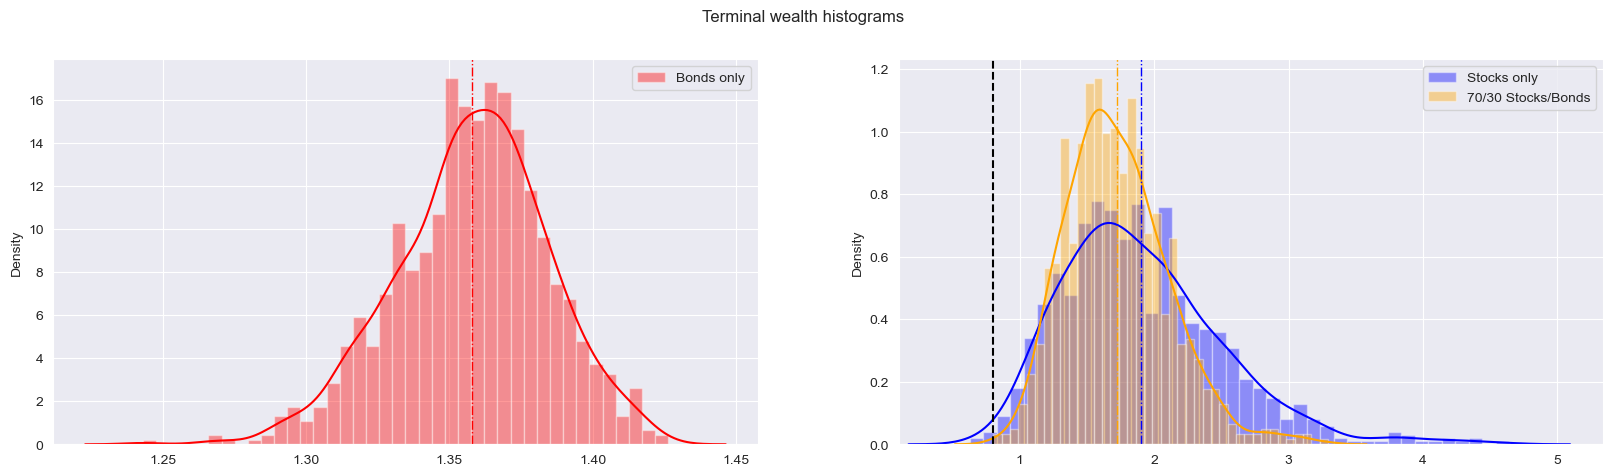

In [65]:
# Plotting histograms of terminal wealth for different investment strategies
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot( pok.terminal_wealth(bond_rets), bins=40, color="red", label="Bonds only", ax=ax[0]) 
sns.distplot( pok.terminal_wealth(stock_rets), bins=40, color="blue", label="Stocks only", ax=ax[1])
sns.distplot( pok.terminal_wealth(stock_bond_rets), bins=40, color="orange", label="70/30 Stocks/Bonds", ax=ax[1])
plt.suptitle("Terminal wealth histograms")
ax[0].axvline( x=pok.terminal_wealth(bond_rets).mean(), linestyle="-.", color="red", linewidth=1)
ax[1].axvline( x=pok.terminal_wealth(stock_rets).mean(), linestyle="-.", color="blue", linewidth=1)
ax[1].axvline( x=pok.terminal_wealth(stock_bond_rets).mean(), linestyle="-.", color="orange", linewidth=1)
ax[1].axvline( x=floor, linestyle="--", color="k")
ax[1].set_xlim(left=0.1) 
ax[0].legend(), ax[0].grid()
ax[1].legend(), ax[1].grid()
plt.show()

These histograms show the distribution of terminal wealths for each investment strategy. The plot on the right includes a vertical line representing the floor, allowing for visual identification of scenarios where the terminal wealth falls below this threshold. In both the PSP (stocks) and mixed PSP/LHP (stocks/bonds) cases, there is a possibility of breaching the floor, highlighting the importance of considering risk when designing an LDI strategy.

#### Glide Path Weight Allocation Strategy

Rather than adhering to a fixed weight allocation throughout an investment strategy's entire lifespan, a **`dynamic approach`** can be employed. This involves employing a fixed weight allocation that **`evolves over time`**, particularly adjusting the weights allocated to the PSP (Performance-Seeking Portfolio).

An example of such a strategy is starting with an 80/20 allocation in stocks/bonds and gradually shifting to a 20/80 allocation by maturity:

In [67]:
# Generate the glide path allocation between stocks and bonds from 80/20 to 20/80
pok.ldi_glidepath_allocator(stock_rets, bond_rets, start=0.8, end=0.2)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
1,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,...,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000
2,0.768421,0.768421,0.768421,0.768421,0.768421,0.768421,0.768421,0.768421,0.768421,0.768421,...,0.768421,0.768421,0.768421,0.768421,0.768421,0.768421,0.768421,0.768421,0.768421,0.768421
3,0.736842,0.736842,0.736842,0.736842,0.736842,0.736842,0.736842,0.736842,0.736842,0.736842,...,0.736842,0.736842,0.736842,0.736842,0.736842,0.736842,0.736842,0.736842,0.736842,0.736842
4,0.705263,0.705263,0.705263,0.705263,0.705263,0.705263,0.705263,0.705263,0.705263,0.705263,...,0.705263,0.705263,0.705263,0.705263,0.705263,0.705263,0.705263,0.705263,0.705263,0.705263
5,0.673684,0.673684,0.673684,0.673684,0.673684,0.673684,0.673684,0.673684,0.673684,0.673684,...,0.673684,0.673684,0.673684,0.673684,0.673684,0.673684,0.673684,0.673684,0.673684,0.673684
6,0.642105,0.642105,0.642105,0.642105,0.642105,0.642105,0.642105,0.642105,0.642105,0.642105,...,0.642105,0.642105,0.642105,0.642105,0.642105,0.642105,0.642105,0.642105,0.642105,0.642105
7,0.610526,0.610526,0.610526,0.610526,0.610526,0.610526,0.610526,0.610526,0.610526,0.610526,...,0.610526,0.610526,0.610526,0.610526,0.610526,0.610526,0.610526,0.610526,0.610526,0.610526
8,0.578947,0.578947,0.578947,0.578947,0.578947,0.578947,0.578947,0.578947,0.578947,0.578947,...,0.578947,0.578947,0.578947,0.578947,0.578947,0.578947,0.578947,0.578947,0.578947,0.578947
9,0.547368,0.547368,0.547368,0.547368,0.547368,0.547368,0.547368,0.547368,0.547368,0.547368,...,0.547368,0.547368,0.547368,0.547368,0.547368,0.547368,0.547368,0.547368,0.547368,0.547368
10,0.515789,0.515789,0.515789,0.515789,0.515789,0.515789,0.515789,0.515789,0.515789,0.515789,...,0.515789,0.515789,0.515789,0.515789,0.515789,0.515789,0.515789,0.515789,0.515789,0.515789


This code snippet demonstrates how to create a glide path that adjusts the asset allocation between stocks and bonds over time, starting predominantly with stocks and gradually shifting towards bonds.

With this evolving allocation, the mixed PSP/LHP portfolio's returns would look like this:

In [68]:
# Calculate the returns of the PSP/LHP strategy with a glide path allocation
stock_bond_rets_glide = pok.ldi_mixer(stock_rets, bond_rets, allocator=pok.ldi_glidepath_allocator, start=0.8, end=0.2)
stock_bond_rets_glide.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
1,0.067695,0.048782,0.013340,0.086721,0.002428,-0.041778,0.073816,-0.021328,0.082633,0.098930,...,0.057581,-0.001360,0.050980,-0.034684,-0.032930,0.049859,0.049364,0.061792,0.052567,-0.057665
2,0.047476,0.000800,0.101132,0.014488,0.069061,0.067734,0.032972,0.016882,-0.015221,0.089532,...,0.067192,0.063059,0.019508,0.135730,0.066609,0.052277,0.026747,0.003063,-0.063819,-0.042743
3,0.010871,0.107625,0.031653,0.021805,-0.002626,0.067555,0.054865,0.021984,0.057239,0.008160,...,0.055503,0.029439,-0.006983,0.052590,0.094052,0.038285,-0.019191,0.101378,-0.009657,-0.012545
4,0.168980,0.084296,0.031453,0.021480,0.034883,0.128049,0.004981,0.080774,-0.009166,0.034347,...,-0.046967,0.029405,-0.022939,0.066527,0.045326,0.031464,0.047504,0.021917,-0.068676,-0.100908
5,0.024587,-0.042911,0.103285,-0.028818,0.116282,0.000845,-0.042448,0.078138,0.040646,0.082723,...,0.095686,0.048192,0.030930,-0.016558,-0.012460,0.145102,0.003288,0.054253,0.086874,-0.035765


This output will show the initial returns for a portfolio where the allocation between stocks and bonds changes over time according to the specified glide path.

To evaluate the effectiveness of this approach, especially in terms of risk management, the terminal statistics can be compared across various strategies:

In [69]:
# Define a floor value for risk assessment
floor = 0.8

# Calculate and print the summary stats of terminal parameters for different investment strategies
ldi_stats = pd.concat([
    pok.summary_stats_terminal(bond_rets, floor=floor, periods_per_year=periods_per_year, name="Bonds only"),
    pok.summary_stats_terminal(stock_rets, floor=floor, periods_per_year=periods_per_year, name="Stocks only"),
    pok.summary_stats_terminal(stock_bond_rets, floor=floor, periods_per_year=periods_per_year, name="70/30 Stocks/Bonds"),
    pok.summary_stats_terminal(stock_bond_rets_glide, floor=floor, periods_per_year=periods_per_year, name="Glide 80/20 Stocks/Bonds"),
], axis=1)
ldi_stats

,Bonds only,Stocks only,70/30 Stocks/Bonds,Glide 80/20 Stocks/Bonds
Mean ann. ret.,0.031043,0.062035,0.053714,0.047973
Mean wealth,1.357822,1.906154,1.723778,1.617954
Mean wealth std,0.026598,0.603000,0.379104,0.272572
Prob breach,0.000000,0.005000,0.000000,0.000000
Exp shortfall,0.000000,0.085520,0.000000,0.000000


This summary provides insights into the risk and return profiles of different strategies, including the glide path approach. It highlights important metrics such as the mean annualized return, mean wealth, and probability of breaching the predefined floor.

The glide path strategy, which becomes more conservative as it approaches maturity, may offer a better risk-adjusted approach. It potentially reduces the likelihood of breaching the floor in exchange for a slightly lower return and terminal wealth. It's important to note that the results are scenario-dependent and may vary with different simulations of rates and stock prices.

#### Integrating Floor Considerations with Performance-Seeking and Liability-Hedging Portfolios

To enhance investment strategy, this section introduces allocators that consider a predefined floor value, the minimum acceptable portfolio level. The mixed PSP/LHP strategy now employs **`zero-coupon bonds (ZCBs)`** as a proxy for the Liability-Hedging Portfolio (LHP) instead of coupon-bearing bonds.

In [70]:
# Parameters for simulating interest rates and zero-coupon bond prices
n_scenarios      = 1000
n_years          = 10
mean_rate        = 0.03
periods_per_year = 12 

# Simulating rates and zero-coupon bond prices
rates, zcb_price = pok.simulate_cir(n_years=n_years, n_scenarios=n_scenarios, a=0.05, b=mean_rate, 
                                    sigma=0.02, periods_per_year=periods_per_year)

# Computing zero-coupon bond returns and simulating stock prices
zcb_rets = zcb_price.pct_change().dropna()
stock_price, stock_rets = pok.simulate_gbm_from_prices(n_years=n_years, n_scenarios=n_scenarios, 
                                                       mu=0.07, sigma=0.15, periods_per_year=periods_per_year)

**`ZCB returns are directly calculated from percentage changes in price`**, as they don't distribute coupons during their life.

**Fixed 70/30 Allocation Strategy**:

Initial implementation of a **`fixed 70/30 stocks/bonds allocation`**:

In [71]:
w1 = 0.7  # Allocation weight for stocks
stock_zcb_rets = pok.ldi_mixer(stock_rets, zcb_rets, allocator=pok.ldi_fixed_allocator, w1=w1)

floor = 0.8  # Predefined floor value
# Calculating and comparing summary stats of terminal parameters for ZCBs, stocks, and 70/30 stocks/ZCBs
ldi_stats = pd.concat([
    pok.summary_stats_terminal(zcb_rets, floor=floor, periods_per_year=periods_per_year, name="ZCB only"),
    pok.summary_stats_terminal(stock_rets, floor=floor, periods_per_year=periods_per_year, name="Stocks only"),
    pok.summary_stats_terminal(stock_zcb_rets, floor=floor, periods_per_year=periods_per_year, name="70/30 Stocks/ZCB"),
], axis=1).round(4)
ldi_stats

,ZCB only,Stocks only,70/30 Stocks/ZCB
Mean ann. ret.,0.0300,0.0496,0.0459
Mean wealth,1.3433,1.7996,1.6481
Mean wealth std,0.0000,0.9099,0.5678
Prob breach,0.0000,0.0730,0.0240
Exp shortfall,0.0000,0.1523,0.0980


Investing solely in ZCBs results in lower returns but ensures no breach of the floor. A mixed PSP/LHP strategy enhances performance with a slight risk of breaching the floor.

#### Floor Allocator

Utilizing a **`floor allocator to modulate PSP allocation based on a cushion determined by the floor value and the ZCB price`**:

In [72]:
floor = 0.8  # Floor value

# Implementing the floor allocator with different multipliers (m = 1,3,5) to modulate PSP allocation
stock_zcb_floor_m1_rets = pok.ldi_mixer(stock_rets, zcb_rets, allocator=pok.ldi_floor_allocator, 
                                        zcb_price=zcb_price.loc[1:], floor=floor, m=1)
# Repeat for m=3 and m=5

# Comparing strategies with different multipliers
ldi_stats = pd.concat([
    ldi_stats,
    pok.summary_stats_terminal(stock_zcb_floor_m1_rets, floor=floor, periods_per_year=periods_per_year, name="Floor(0.8-1) Stocks/ZCB"),
    # Repeat for m=3 and m=5 strategies
], axis=1).round(4)
ldi_stats

,ZCB only,Stocks only,70/30 Stocks/ZCB,Floor(0.8-1) Stocks/ZCB
Mean ann. ret.,0.0300,0.0496,0.0459,0.0411
Mean wealth,1.3433,1.7996,1.6481,1.5299
Mean wealth std,0.0000,0.9099,0.5678,0.3679
Prob breach,0.0000,0.0730,0.0240,0.0000
Exp shortfall,0.0000,0.1523,0.0980,0.0000


The strategy modulates PSP allocation, $m$ ($m=1,3,5$), to maximize performance while considering the floor value. Strategies with higher multipliers, here $m=5$, show better performance but slightly increased risk of breaching the floor.

#### Drawdown Allocator

Implementing a drawdown allocator that dynamically adjusts the floor based on previous peaks:

In [73]:
# Implementing the drawdown allocator with a maximum drawdown constraint
maxdd = 0.2  # Maximum drawdown limit
stock_zcb_dd_02_rets = pok.ldi_mixer(stock_rets, zcb_rets, allocator=pok.ldi_drawdown_allocator, maxdd=maxdd)

# Comparing strategies with and without drawdown constraints
ldi_stats = pd.concat([
    ldi_stats,
    pok.summary_stats_terminal(stock_zcb_dd_02_rets, floor=1 - maxdd, periods_per_year=periods_per_year, name="DD(0.2) Stocks/ZCB"),
], axis=1).round(4)
ldi_stats

,ZCB only,Stocks only,70/30 Stocks/ZCB,Floor(0.8-1) Stocks/ZCB,DD(0.2) Stocks/ZCB
Mean ann. ret.,0.0300,0.0496,0.0459,0.0411,0.0446
Mean wealth,1.3433,1.7996,1.6481,1.5299,1.6379
Mean wealth std,0.0000,0.9099,0.5678,0.3679,0.6432
Prob breach,0.0000,0.0730,0.0240,0.0000,0.0000
Exp shortfall,0.0000,0.1523,0.0980,0.0000,0.0000


This allocator responds to market downturns by reducing PSP exposure, mitigating the risk of large losses.

#### Considering Cash as an Alternative LHP

Exploring investment in cash as an alternative to ZCBs for the LHP:

In [74]:
ann_cashrate = 0.02  # Annual cash rate
monthly_cashrets = (1 + ann_cashrate)**(1/12) - 1  # Monthly cash returns
cash_rets = pd.DataFrame(data=monthly_cashrets, index=stock_rets.index, columns=stock_rets.columns)

# Implementing the drawdown allocator with cash as the LHP
stock_cash_dd_02_rets = pok.ldi_mixer(stock_rets, cash_rets, allocator=pok.ldi_drawdown_allocator, maxdd=0.2)

# Comparing strategies with cash as LHP
ldi_stats = pd.concat([
    ldi_stats,
    pok.summary_stats_terminal(stock_cash_dd_02_rets, floor=1 - 0.2, periods_per_year=periods_per_year, name="DD(0.2) Stocks/Cash"),
], axis=1).round(4)
ldi_stats

,ZCB only,Stocks only,70/30 Stocks/ZCB,Floor(0.8-1) Stocks/ZCB,DD(0.2) Stocks/ZCB,DD(0.2) Stocks/Cash
Mean ann. ret.,0.0300,0.0496,0.0459,0.0411,0.0446,0.0400
Mean wealth,1.3433,1.7996,1.6481,1.5299,1.6379,1.5696
Mean wealth std,0.0000,0.9099,0.5678,0.3679,0.6432,0.6298
Prob breach,0.0000,0.0730,0.0240,0.0000,0.0000,0.0000
Exp shortfall,0.0000,0.1523,0.0980,0.0000,0.0000,0.0000


This strategy explores the effectiveness of **`cash as a hedging asset`** in the LHP, potentially offering a simpler alternative to ZCBs.

Now Let's summurize all the above strategies defined in a diagram:

C:\Users\amine\AppData\Local\Temp\ipykernel_24168\361075775.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tw_stock, bins=40, color="red", label="Stocks only", ax=ax)
c:\Users\amine\bin\miniconda3\envs\QuantFinanceHub\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amine\AppData\Local\Temp\ipykernel_24168\361075775.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code t

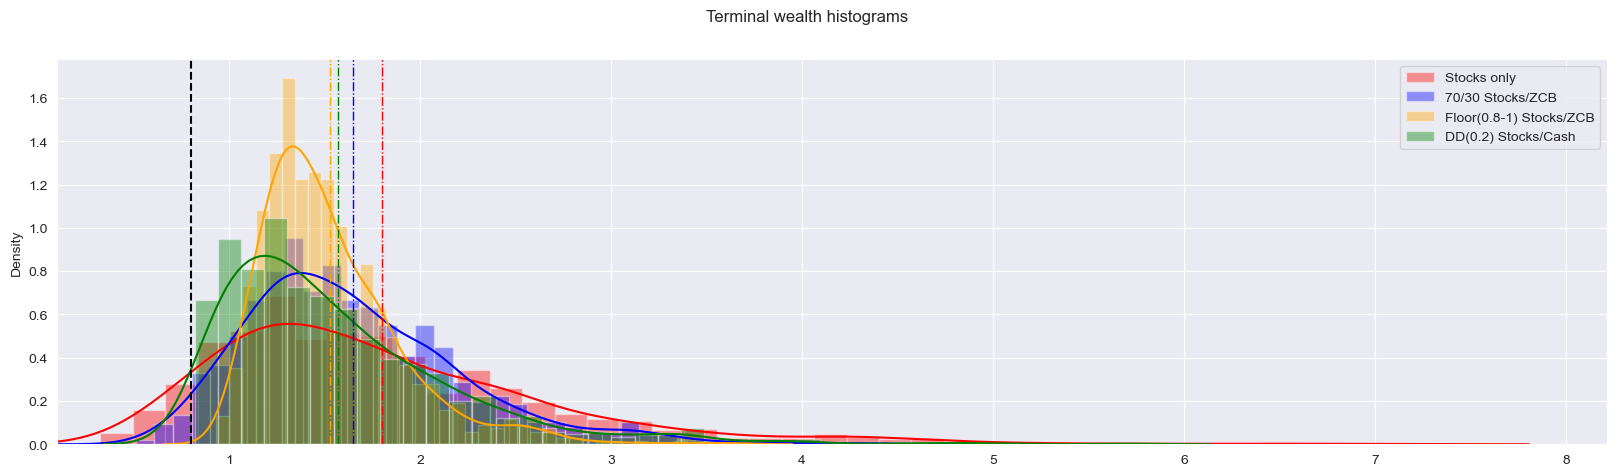

In [75]:
# Plotting histograms of the terminal wealths to understand the distribution and risk profiles of different strategies
# Compute terminal wealth for each investment strategy
tw_stock              = pok.terminal_wealth(stock_rets)
tw_stock_zcb          = pok.terminal_wealth(stock_zcb_rets)
tw_stock_zcb_floor_m1 = pok.terminal_wealth(stock_zcb_floor_m1_rets)
tw_stock_cash_dd_02   = pok.terminal_wealth(stock_cash_dd_02_rets)

# Create a figure and axis for the histogram plot
fig, ax = plt.subplots(1,1,figsize=(20,5))

# Plot histograms for terminal wealth of each strategy
sns.distplot(tw_stock, bins=40, color="red", label="Stocks only", ax=ax)
sns.distplot(tw_stock_zcb, bins=40, color="blue", label="70/30 Stocks/ZCB", ax=ax)
sns.distplot(tw_stock_zcb_floor_m1, bins=40, color="orange", label="Floor(0.8-1) Stocks/ZCB", ax=ax)
sns.distplot(tw_stock_cash_dd_02, bins=40, color="green", label="DD(0.2) Stocks/Cash", ax=ax)

# Add a title and labels
plt.suptitle("Terminal wealth histograms")

# Add vertical lines representing the mean terminal wealth for each strategy
ax.axvline(x=tw_stock.mean(), linestyle="-.", color="red", linewidth=1)
ax.axvline(x=tw_stock_zcb.mean(), linestyle="-.", color="blue", linewidth=1)
ax.axvline(x=tw_stock_zcb_floor_m1.mean(), linestyle="-.", color="orange", linewidth=1)
ax.axvline(x=tw_stock_cash_dd_02.mean(), linestyle="-.", color="green", linewidth=1)

# Add a vertical line representing the floor value
ax.axvline(x=floor, linestyle="--", color="k")

# Set the x-axis limit to focus on the relevant part of the distribution
ax.set_xlim(left=0.1)

# Add a legend and grid for better readability
ax.legend(), ax.grid()

# Display the plot
plt.show()

#### Real-World Application with Historical Data

Applying the PSP/LHP strategy to historical data, like total market index returns, for a more practical perspective:

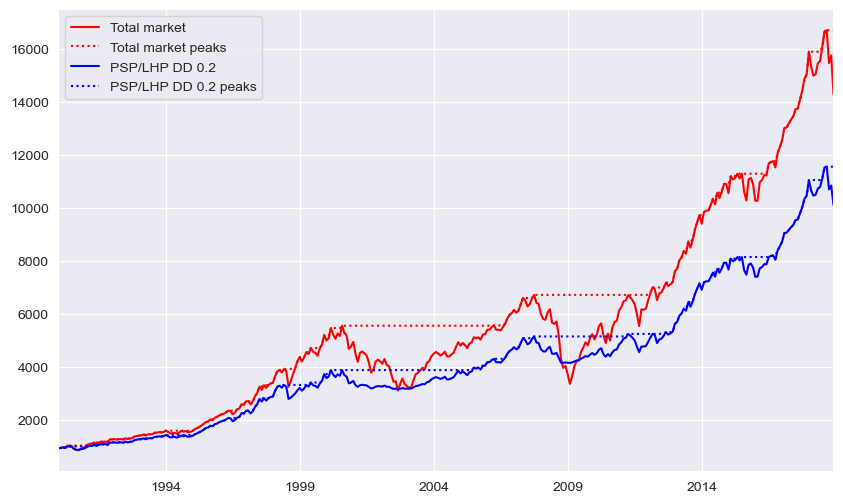

c:\Users\amine\bin\github-projects\Investment-Management-with-Python-and-Machine-Learning-Specialization\1-Introduction-to-Portfolio-Construction-and-Analysis-with-Python\notebooks\../..\PortfolioOptimizationKit.py:352: RuntimeWarning: divide by zero encountered in scalar divide
  return ann_ex_rets / ann_vol


,Ann. return,Ann. vol,Sharpe ratio,Skewness,Kurtosis,Historic CVar,C-F Var,Max Drawdown
Tot. Market (PSP),0.096058,0.145419,0.660558,-0.668827,4.247282,0.094633,0.066949,-0.499943
Cash (LHP),0.030000,0.000000,inf,NaN,NaN,NaN,NaN,0.000000
PSP/LHP(DD0.2),0.083038,0.100860,0.823297,-0.654863,4.948615,0.062031,0.044762,-0.194234


In [77]:
tmi_rets = pok.get_total_market_index_returns()["1990":]  # Total market index returns

# Computing drawdown and peaks for total market index
dd_tmi = pok.drawdown(tmi_rets)

# Constructing the LHP with cash returns
ann_cashrate = 0.03
monthly_cashrets = (1 + ann_cashrate)**(1/12) - 1
cash_rets = pd.DataFrame(data=monthly_cashrets, index=tmi_rets.index, columns=[0])  # Single scenario

# PSP/LHP strategy with Total Market/Cash
tmi_cash_dd_02_rets = pok.ldi_mixer(pd.DataFrame(tmi_rets), cash_rets, allocator=pok.ldi_drawdown_allocator, maxdd=0.2)

# Computing drawdowns and peaks for the PSP/LHP strategy
dd_psp_lhp = pok.drawdown(tmi_cash_dd_02_rets[0])

# Visualizing wealth and peaks for total market and PSP/LHP strategies
fig, ax = plt.subplots(1,1,figsize=(10,6))
dd_tmi["Wealth"].plot(ax=ax, grid=True, color="red", label="Total market")
dd_tmi["Peaks"].plot(ax=ax, grid=True, ls=":", color="red", label="Total market peaks")
dd_psp_lhp["Wealth"].plot(ax=ax, grid=True, color="blue", label="PSP/LHP DD 0.2")
dd_psp_lhp["Peaks"].plot(ax=ax, grid=True, ls=":", color="blue", label="PSP/LHP DD 0.2 peaks")
plt.legend()
plt.show()

# Computing and displaying summary stats for investments
invests = pd.concat([
    tmi_rets.rename("Tot. Market (PSP)"), 
    cash_rets[0].rename("Cash (LHP)"), 
    tmi_cash_dd_02_rets[0].rename("PSP/LHP(DD0.2)")
], axis=1)
pok.summary_stats(invests, risk_free_rate=0, periods_per_year=12)

This approach applies the PSP/LHP strategy to real market data, offering insights into its practicality and effectiveness. The stats reveal how the strategy performs in terms of growth and maximum drawdown compared to investing solely in the market or cash.

## Additional Insights: Modified Duration

Consider a bond with cash flows $c_i$ at time $t_i$. The bond price $B$ and its yield to maturity (YTM) with continuous compounding are linked by:

$$
B = \sum_{i=1}^Nc_i e^{-\text{YTM} t_i}.
$$

**`This equation implies that the bond price is essentially the present value of all its future payments`**.

This is consistent with the formula for the bond price previously introduced, specifically for coupon-bearing bonds with continuous compounding. In this context, each term $c_i e^{-\text{YTM} t_i}$ represents the present value $\text{PV}_i$ of the $i$-th payment, with the final payment $c_N$ including both the coupon and principal.

### Duration revisited

In this notation, the **`Macaulay Duration`** is expressed as:

$$
\text{MacD} := \frac{ \sum_{i=1}^N t_i c_i e^{-\text{YTM} t_i} }{ B } = \sum_{i=1}^{N} w_i t_i 
\quad \text{where} \quad 
w_i := \frac{ c_i e^{-\text{YTM} t_i}}{B},
$$

aligning with the previously given definition of Macaulay Duration.

The focus here is on the Modified Duration, an important concept when considering small changes $\Delta\text{YTM}$ in the yield. The bond price change is approximately:

$$
\Delta B = \frac{dB}{d\text{YTM}} \Delta\text{YTM}.
$$

The derivative of $B$ with respect to $d\text{YTM}$ is:

$$
\frac{dB}{d\text{YTM}} = - \sum_{i=1}^N t_i c_i e^{-\text{YTM} t_i},
$$

leading to:

$$
\Delta B = \frac{dB}{d\text{YTM}} \Delta\text{YTM} = - \sum_{i=1}^N t_i c_i e^{-\text{YTM} t_i} \; \Delta\text{YTM}.
$$

This illustrates the inverse relationship between bond price $B$ and YTM. As $B$ increases, YTM decreases, and vice versa.

Using the Macaulay Duration, this relationship can be rewritten as:

$$
\Delta B = - \text{MacD} \, B \, \Delta\text{YTM}, 
\qquad\text{i.e.}\qquad
\frac{\Delta B}{B} = - \text{MacD} \, \Delta\text{YTM}.
$$

This equation is **an approximate relationship between percentage changes in a bond price and changes in its YTM**. 

This equation approximates the relationship between percentage changes in a bond price and changes in its YTM.

Consider a 3-year, $10\%$ coupon bond with a face value of $\$100$, a $\text{YTM}=12\%$ per annum with continuous compounding, and semi-annual coupon payments of $\$5$.

In [78]:
principal        = 100
maturity         = 3
ytm              = 0.12
coupon_rate      = 0.10
coupons_per_year = 2

# Calculate the cash flows for each period and normalize the dates.
cf = pok.bond_cash_flows(principal=principal, maturity=maturity, coupon_rate=coupon_rate, coupons_per_year=coupons_per_year)
cf.index = cf.index / coupons_per_year
cf

,0
0.5,5.0
1.0,5.0
1.5,5.0
2.0,5.0
2.5,5.0
3.0,105.0


Manually compute the bond price and Macaulay Duration for continuous compounding:

In [79]:
# Calculate present values of cash flows.
pvs = [ (cf.iloc[t] * np.exp(-ytm * cf.index[t]))[0] for t in range(len(cf.index)) ]
# Sum of present values is the bond price.
B   = sum(pvs) 
# Weights are present values over bond price.
ww  = [ pv/B for pv in pvs]
# Calculate time-weighted weights.
tw  = [ cf.index[t] * ww[t] for t in range(len(cf.index)) ]

# Create a DataFrame for analysis.
df  = pd.DataFrame([pvs, ww, tw], index=["PVs","Weights","t x weight"], columns=cf.index).T
df.insert(loc=0, column="Cash Flows", value=cf)
df

,Cash Flows,PVs,Weights,t x weight
0.5,5.0,4.708823,0.049981,0.024990
1.0,5.0,4.434602,0.047070,0.047070
1.5,5.0,4.176351,0.044329,0.066493
2.0,5.0,3.933139,0.041747,0.083495
2.5,5.0,3.704091,0.039316,0.098290
3.0,105.0,73.256014,0.777557,2.332672


Calculate bond price and Macaulay Duration:

In [80]:
# Bond price (already computed above).
B = df["PVs"].sum()
print(B) 

# Macaulay Duration.
macD = df["t x weight"].sum()
print(macD)

94.213020554763
2.653010037390808


And calculate $B\times \text{MacD}$:

In [81]:
print(B * macD)

249.94808918469275


> 📢 **Note**
>
> *It's important to remember that $1$ basis point (bp) corresponds to $0.01\%$.*

With an increase in YTM by $10$ basis points (i.e., $0.1\%$), $\Delta\text{YTM}=+0.001$. The predicted price decrease is:

In [84]:
# \DeltaB = - B * macD * DeltaYTM
delta_B = - B * macD * 0.001
print(delta_B)

-0.24994808918469275


The new expected bond price is:

In [85]:
print(B + delta_B)

93.9630724655783


Valuing the bond using its YTM in the usual way, when the bond yield increases by 10 basis points to 
$12.1\%$:

In [86]:
new_ytm = 0.121

# Calculate new present values of cash flows.
pvs = [ (cf.iloc[t] * np.exp(-new_ytm * cf.index[t]))[0] for t in range(len(cf.index)) ]

# Sum of new present values is the bond price.
B = sum(pvs) 
print(B)

93.96342871603265


This confirms the accuracy of the duration relationship up to three decimal points.